In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [ ]:
# Ambil datanya
df = pd.read_excel(r"C:\Users\Robyi\Documents\Data Science Dataset\all.xlsx", sheet_name='wine')
df["Date"] = pd.to_datetime(df['Date'])
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Date,,,,,,,,,,,,,,
2020-01-01,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2020-01-02,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2020-01-03,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2020-01-04,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
2020-01-05,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# Fungsi melihat rata-rata
df['Ash'].mean()

# Terlihat bahwa Ash memiliki rata-rata 2.366

2.3665168539325845

In [4]:
# Fungsi melihat rata-rata tapi di potong
stats.trim_mean(df['Ash'], 0.1)

# Terlihat bahwa data dipotong sebanyak 0.1 alias 10% dari data paling kecil dan data paling besar(total 20% dari data)
# Setelah dipotong maka dihitung rata-ratanya, sehingga terlihat trim mean dari data Ash adalah 2.373

2.37375

In [5]:
# Fungsi melihat nilai tengah
df["Ash"].median()

# Terlihat, nilai tengah dari Ash adalah 2.36

2.36

In [ ]:
# Fungsi mean dengan memberikan bobot
np.average(df['Ash'], weights=df['Alcohol'])

# Weighted mean berarti setiap 1 row Ash di kali pasangan 1 row Alcohol
# Jadi misal kalau mean Ash sederhana itu hanya: 1+2+1/3
# Kalau mean Alcohol sederhana itu hanya: 2+4+5/3
# Jadi weighted mean antara Ash dan Alcohol itu: (1*2)+(2*4)+(1*5)/3

# Terlihat bahwa mean dari Ash yang diberi bobot Alcohol adalah 2.39 

2.3981421517424746

In [ ]:
# Melihat standar deviasi dari data
df['Ash'].std()

# Standar deviasi adalah jarak data dari mean
# Misal mean-nya 50 dan standar deviasi-nya 5
# Maka mean sebenarnya adalah +- 5, yaitu 45 dan 55
# Semakin besar standar deviasi, maka semakin menyebar data-nya dari rata-rata

# Terlihat standar deviasi dari Ash adalah 0.27, yang artinya +- 0.27
# Jika rata-rata Ash adalah 2.366, maka mean aslinya adalah 2.096(2.366-0.27) dan 2.636(2.366+0.27)

0.2743440090608148

In [17]:
# Fungsi melihat Quaintile / Percentile (0-1)
print(df['Ash'].quantile(0.95))
print(df['Ash'].quantile(0.75))
print(df['Ash'].quantile(0.50))
print(df['Ash'].quantile(0.25))
print(df['Ash'].quantile(0.05))

# Quantile artinya membagi data menjadi bagian-bagian tertentu
# Misal di quantile 0.25 hasilnya adalah 2.21, yang artinya 25% data kurang dari atau sama dengan 2.21

# Analogi: jika anda ranking 10 dari 100 orang murid, berarti anda di quantil 0.90 (90% teman ada di bawah-mu)

2.7415000000000003
2.5575
2.36
2.21
1.92


In [ ]:
# Fungsi Interquartile Range
IQR = df['Ash'].quantile(0.75) - df['Ash'].quantile(0.25)
print(IQR)

# Artinya rentang dimana 50% data tengah berada (membuang 25% terkecil dan 25% terbesar)
# Fungsinya adalah untuk mendeteksi outlier dengan rumus: <Q1 - 1.5*IQR dan >Q3+1.5*IQR

0.34750000000000014


In [ ]:
# Fungsi MAD (Median Absolute Deviation)
sm.robust.scale.mad(df['Ash'])

# Kalau standar deviasi biasanya memakai mean (tidak robust terhadap outlier)
# Tapi MAD memakai median (lebih robust terhadap outlier)

0.23721635496089585

Text(0, 0.5, 'Ash')

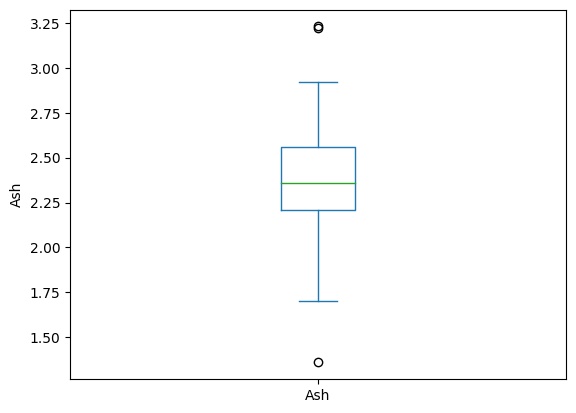

In [ ]:
# Fungsi untuk visualisasi Boxplot
ax = df['Ash'].plot.box()
ax.set_ylabel("Ash")

# Box plot untuk melihat outlier dan distribusi data
# Ada 3 bagian Box plot yaitu box-nya yang berada di tengah. Garis yang berada di area Box. dan Titik bulat yang ada pada luar box dan garis.

# Bagian box itu kotak yang berisi 50% data tengah (membuang 25% data terkecil dan 25% data terbesar)
# dimana garis bawah kotak = Q1, Garis tengah kotak = Q2, Garis atas kotak = Q3, dan tinggi kotak = Q3 - Q1

# Bagian garis adalah batas normal data. Garis bawah artinya dari Q1 turun sampai data terkecil yang masih dalam batas normal. begitu juga baris atas
# Batas normalnya yaitu: Q1 - 1.5*IQR untuk batas bawah, dan Q3 + 1.5 * IQR untuk batas atas

# Bagian titik bulat adalah data tang terlalu ekstrem, kadang disebut outlier, anomali, ataupun data spesial
# Artinya ini sudah melewati batas normal data

# Terlihat di bawah, data Ash ada outlier atas dan bawah yang berada di sekitar nilai 3.25 dan 1.00

In [ ]:
# Untuk melihat distribusi data kategorik (non-numerik)
df['Customer_Segment'].value_counts()

# Terlihat bahwa kelas 2 memiliki data paling banyak

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

Text(0.5, 0, 'Segmen Pelanggan')

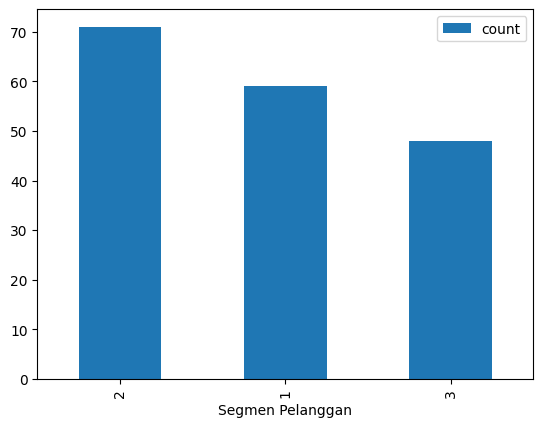

In [ ]:
# Fungsi Bar chart
ax = df['Customer_Segment'].value_counts().plot.bar(legend=True)
ax.set_xlabel("Segmen Pelanggan")

# Hanya visualisasi dari value counts

Text(0.5, 0, 'Ash')

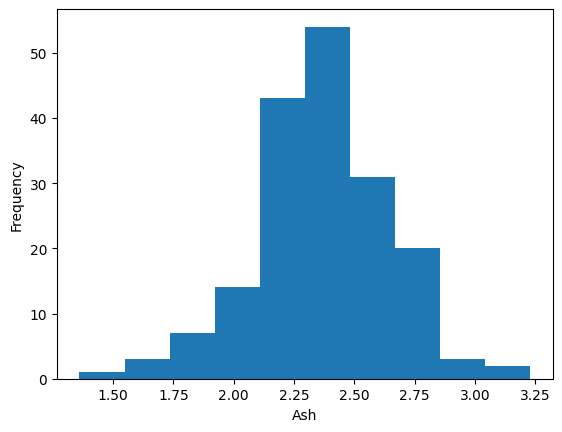

In [ ]:
# Untuk memvisualisasikan histogram
ax = df['Ash'].plot.hist()
ax.set_xlabel('Ash')

# Histogram adalah visualisasi data berdasarkan frekuensi sesuai rentang nilai tertentu (contoh di sini rentang nilai-nya adalah data Ash)
# Dimana sumbuh x adalah rentang nilai (Ash), dan sumbu y adalah frekuensinya

# Histogram bisa melihat outlier, kemiringan kanan dan kiri, distribusi data (uniform, bimodial, normal)

# Terlihat di bawah, bahwa Ash memiliki distribusi data lumayan normal
# Rentang nilai 2.25 sampai 2.50 memiliki data paling banyak
# Outlier dan kemiringan lumayan tidak terlalu

Text(0.5, 0, 'Ash')

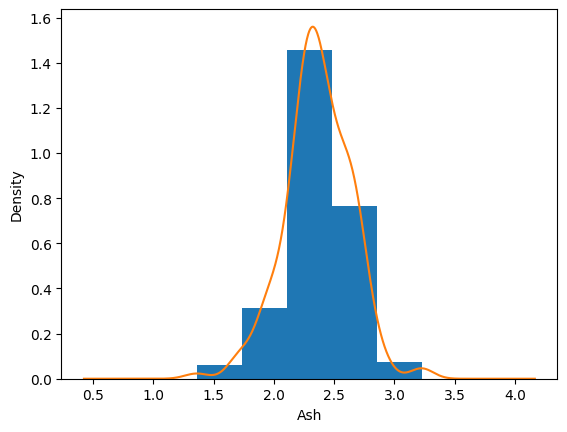

In [ ]:
# Visualisasi Histogram dengan densitas
ax = df['Ash'].plot.hist(density=True ,bins=5)
df['Ash'].plot.density(ax=ax)
ax.set_xlabel('Ash')

# Density adalah luas total di bawah Histogram
# Sumbu Y-nya bukan frekuensi, tapi sebuah kepadatan probabilitas

# Misal antara ash 2.0 sampai 2.5(0.5) ada density 1.5. maka 0.5 * 1.5 = 0.75, artinya 75% data ada pada area tersebut 

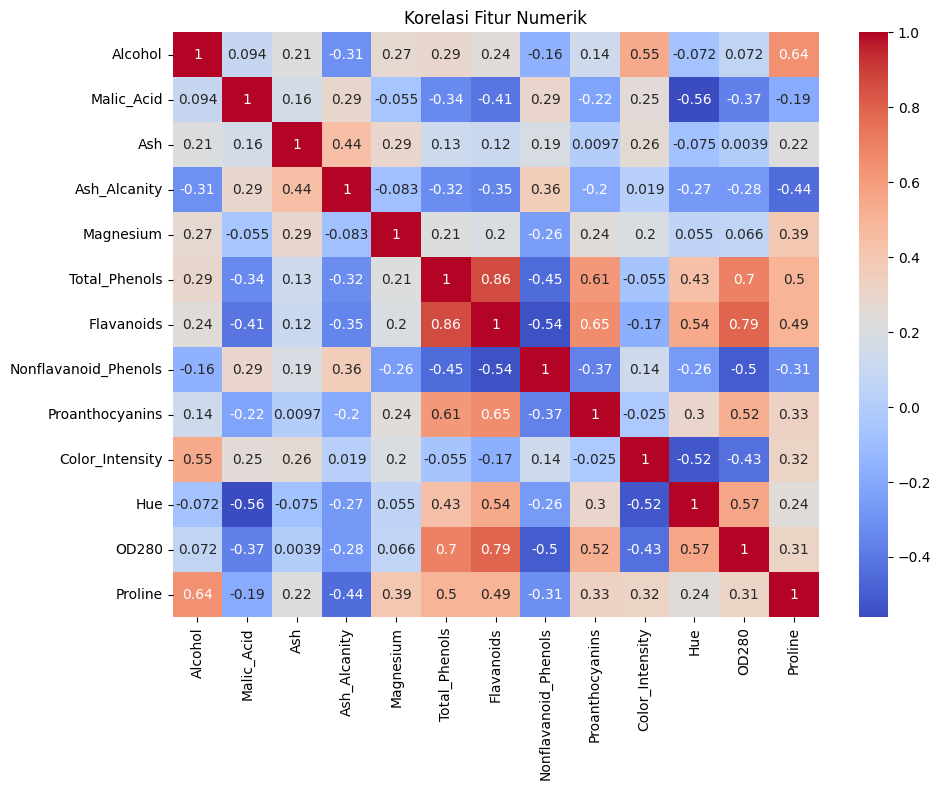

In [ ]:
# Visualisasi korelasi heatmap antar variabel numerik
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns="Customer_Segment").corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

# Korelasi antar variabel, korelasi ini menggunakan metode pearson. bisa juga diubah menjadi: df.corr(method="spearman", atau "kendal")

# Korelasi positif berarti jika A semakin naik, maka B ikut naik. begitu juga sebaliknya
# Korelasi 0 berarti tidak ada hubungan
# Korelasi negatif berarti jika A semakin naik, maka B turun. begitu juga sebaliknya

# Terlhati bahwa total phenols dan flavanoids memiliki korelasi skor 0.86(lumayan tinggi), yang berarti semakin naik total phenols maka flavanoid juga naik
# Terlhati bahwa hue dan malic acid memiliki korelasi skor -0.56(lumayan sedang), yang berarti semakin naik hue maka malic acid akan turun

<Axes: xlabel='Total_Phenols', ylabel='Flavanoids'>

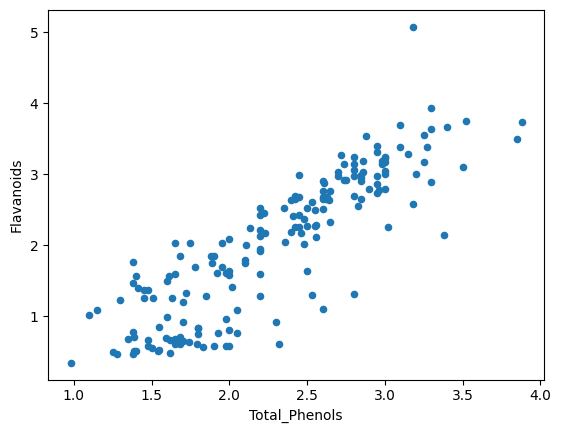

In [ ]:
# Fungsi Scatter plot
df.plot(kind= 'scatter', x ='Total_Phenols', y = 'Flavanoids')

# Untuk melihat hubungan antar 2 variabel

# Terlihat ada semacam pola, dimana sakit naik total phenols maka flavanoids juga makin naik

Text(0, 0.5, 'Flavanoids')

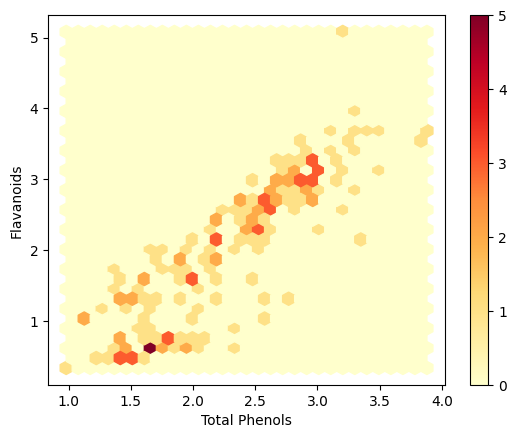

In [ ]:
# Fungsi hexagonal binning
ax = df.plot.hexbin(x ='Total_Phenols', y = 'Flavanoids',
gridsize= 30, sharex=False, cmap='YlOrRd')
ax.set_xlabel('Total Phenols')
ax.set_ylabel('Flavanoids')

# Untuk melihat kepadatan antara hubungan 2 variabel
# Semakin tinggi suhu, maka semakin padat

# terlihat, di antara 0.5 flavanoids dab 1.7 total phenols sangat padat

Text(0.5, 0, 'Total_Phenols')

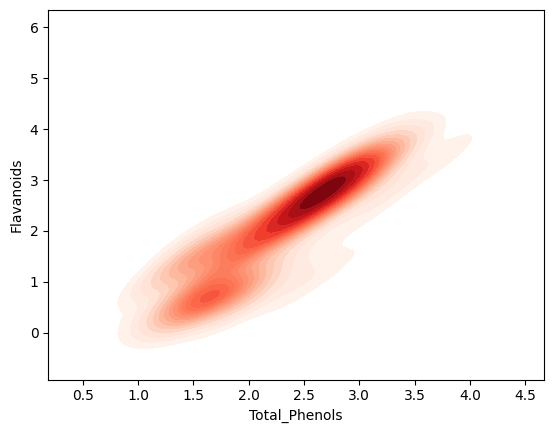

In [ ]:
# Fungsi Kernel Density Estimation Plot
ax = sns.kdeplot(x='Total_Phenols', y='Flavanoids', data=df, fill=True, levels=20, cmap='Reds')
ax.set_ylabel('Flavanoids')
ax.set_xlabel('Total_Phenols')

# Warna semakin pekat, semakin banyak data berkumpul

# Terlihat data sangat berkumpul di area flavanoids 2.8, dan total phenols 2.75

Text(0.5, 0.98, '')

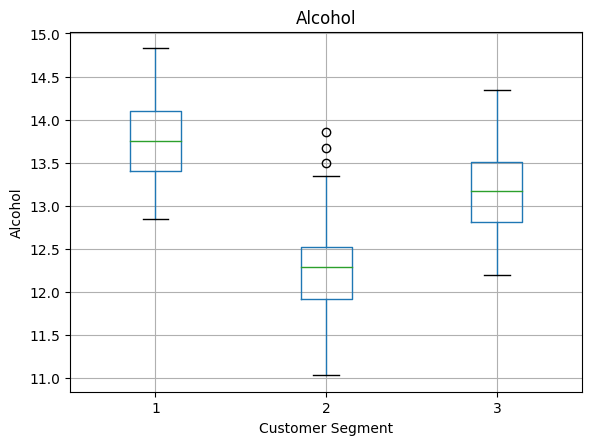

In [ ]:
# Fungsi boxplot 2 variabel
ax = df.boxplot(by='Customer_Segment', column='Alcohol')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Alcohol')
plt.suptitle('')

# Memakai variabel dependen dan independen

# Terlihat customer segmen ke-2 mendeteksi outlier terhadap alkohol

Text(0.5, 0.98, '')

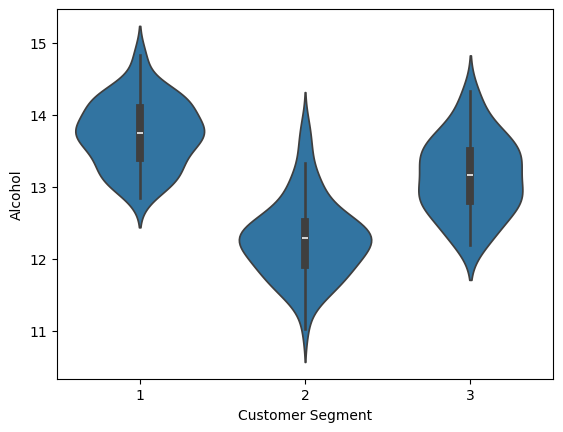

In [ ]:
# Fungsi violin plot
ax = sns.violinplot(x='Customer_Segment', y='Alcohol', data=df, inner='box')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Alcohol')
plt.suptitle('')

# Untuk melihat penumpukan data
# Semakin lebar sayap, semakin data terkumpul di area tersebut
# Semakin banyak area lebar, maka semakin tinggi variasinya
# Kalau ada lebar di bawah atau atas maka data miring
# Kalau ada 2 kelebaran maka data bersifat bimodial

# Terlihat di customer segmen 1, data menumpuk di kadar alcohol 13

Text(0.5, 0.98, '')

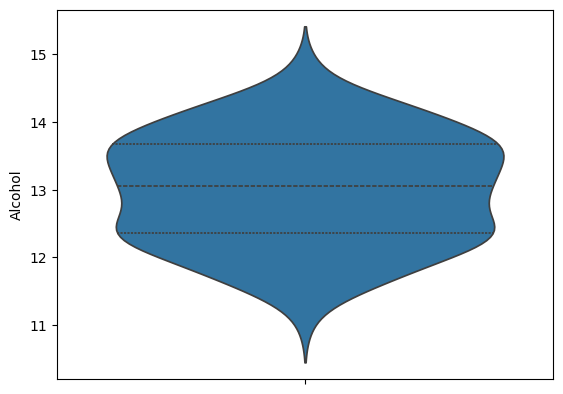

In [ ]:
# Violinplot
ax = sns.violinplot(y='Alcohol', data=df, inner='quart')
ax.set_ylabel('Alcohol')
plt.suptitle('')

# Terlihat bahwa ada 2 area lebar, bisa jadi bimodial. bisa jadi bukan

In [ ]:
# Cek varian pada data
df['Ash'].var()

# Bisa juga begini: df['Ash'].var(ddof=1 atau ddof=0)
# ddof = 1 berarti data merupakan sampel (degree of freedom = 1)
# ddof = 0 berarti data dianggap populasi
# Semakin tinggi varian, semakin menyebar data

# Terlihat varian dari data ini adalah 0.07 yang artinya data tidak terlalu menyebar

0.07526463530756043

In [ ]:
# Fungsi untuk Standar Error (SE)
data = 50
sampel = df['Ash'].sample(50,random_state=42)
standar_error = sampel.std(ddof=1) / np.sqrt(data)
print(standar_error)

# SE ialah ukuran yang menunjukan seberapa besar varian rata-rata sampel terhadap populasi
# Jadi SE hanya digunakan untuk sampel
# Fungsinya untuk mengukur ketidakpastian dari estimasi statistik (proporsi, mean, regresi)

# Terlihat standar error dari 50 sampel dari data populasi Ash adalah 0.0389

0.038933548829894714


bootstrap mean:[2.37634831 2.38202247 2.36803371 ... 2.33876404 2.39011236 2.37033708]


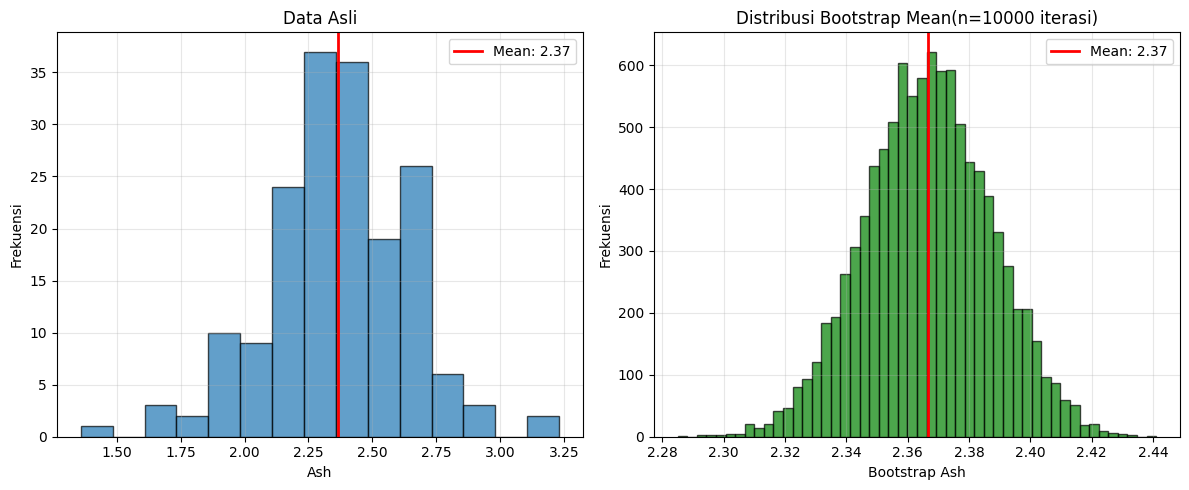

In [17]:
# Teknik bootstrap statistics
n_bootstrap = 10000 # Jumlah iterasi bootstrap
bootstrap_means = []

for i in range (n_bootstrap):
    bootstrap_sample = np.random.choice(df['Ash'], size=len(df['Ash']), replace = True)

    bootstrap_means.append(bootstrap_sample.mean())

bootstrap_mean = np.array(bootstrap_means)

print(f'bootstrap mean:{bootstrap_mean}')

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['Ash'], bins=15, edgecolor='black', alpha=0.7)
plt.axvline(df['Ash'].mean(), color='red', linewidth =2, label=f'Mean: {df["Ash"].mean():.2f}')
plt.xlabel('Ash')
plt.ylabel('Frekuensi')
plt.title("Data Asli")
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.hist(bootstrap_means, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(bootstrap_mean.mean(), color='red', linewidth =2, label=f'Mean: {bootstrap_mean.mean():.2f}')
plt.xlabel('Bootstrap Ash')
plt.ylabel('Frekuensi')
plt.title(f'Distribusi Bootstrap Mean(n={n_bootstrap} iterasi)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Bootstrap adalah teknik resampling, yaitu mengambil sampel berulang kali secara acak dari data yang ada 
# Analoginya: 
# 1) ada 1 kantong kelereng berisi 1000 kelereng
# 2) ambil 100 kelereng secara random (hitung mean-nya satu persatu), lalu replacement (setelh diambil, dikembalikan lagi)
# 3) hitung mean-nya dari 1000 kali replacement itu

# Bagaimanapun data-nya, mau miring atau apapun itu. Bootstrap membuatnya menjadi normal
# Jangan lakukan bootstrap jika data-nya < 20, karena tidak reliable

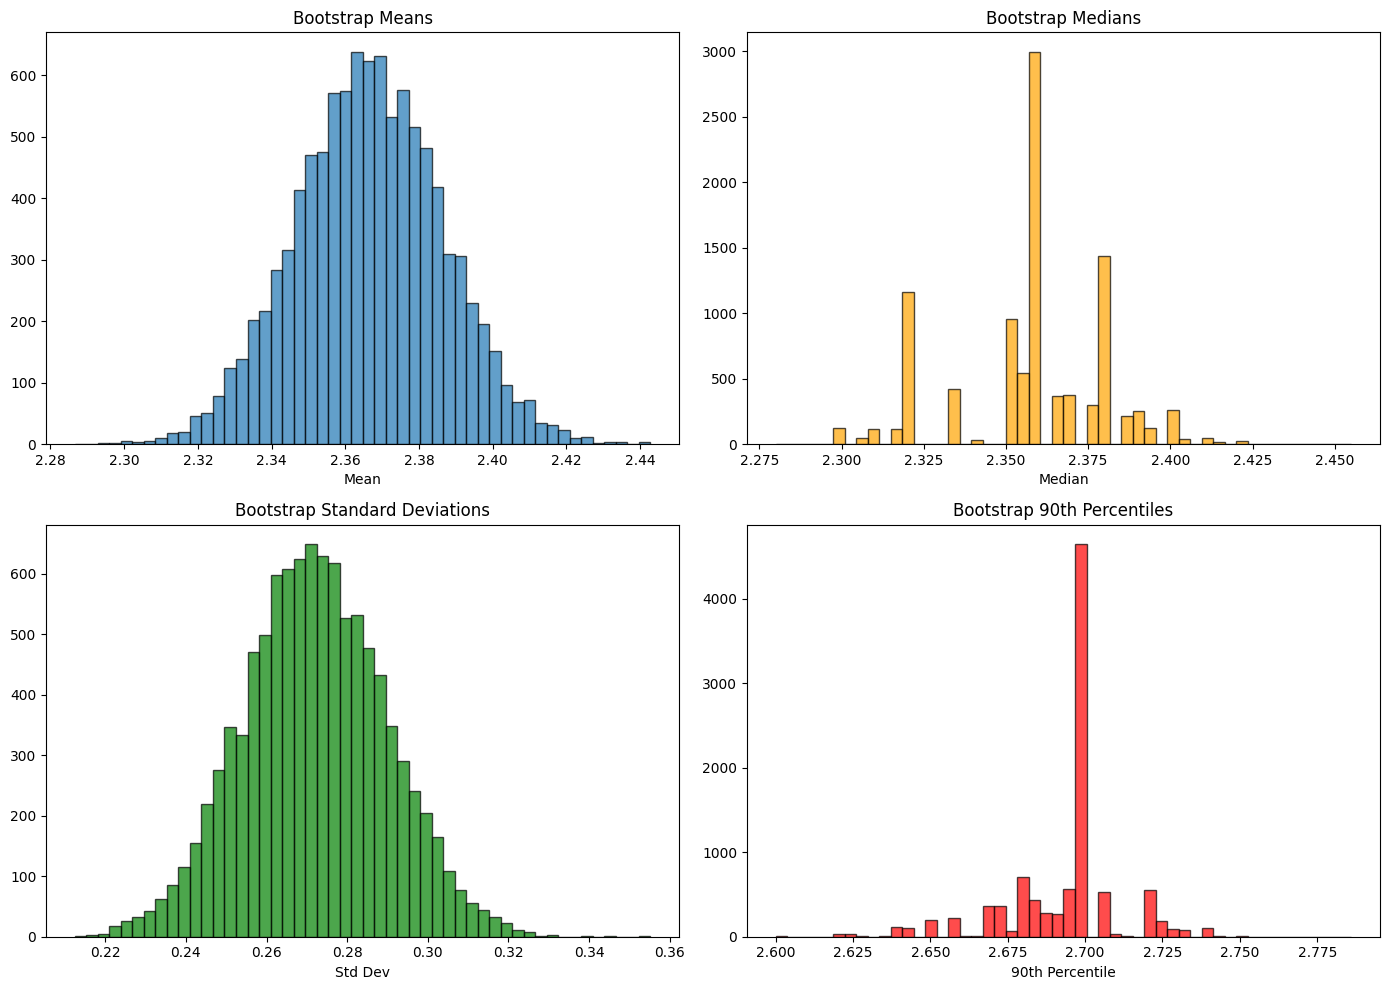

In [ ]:
n_boot = 10000
data = df['Ash']
# Bootstrap untuk berbagai statistik
boot_means = []
boot_medians = []
boot_stds = []
boot_90th_percentiles = []

for _ in range(n_boot):
    sample = np.random.choice(data, size=len(data), replace=True)
    boot_means.append(sample.mean())
    boot_medians.append(np.median(sample))
    boot_stds.append(sample.std())
    boot_90th_percentiles.append(np.percentile(sample, 90))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(boot_means, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Bootstrap Means')
axes[0, 0].set_xlabel('Mean')

axes[0, 1].hist(boot_medians, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Bootstrap Medians')
axes[0, 1].set_xlabel('Median')

axes[1, 0].hist(boot_stds, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Bootstrap Standard Deviations')
axes[1, 0].set_xlabel('Std Dev')

axes[1, 1].hist(boot_90th_percentiles, bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('Bootstrap 90th Percentiles')
axes[1, 1].set_xlabel('90th Percentile')

plt.tight_layout()
plt.show()

data = 50
sampel = boot_stds.sample(50,random_state=42)
standar_error = sampel.std(ddof=1) / np.sqrt(data)
print(standar_error)

CI klasik (95%): (2.3259367465492953, 2.4070969613158737)
CI bootstrap (95%): [2.32583989 2.40691011]


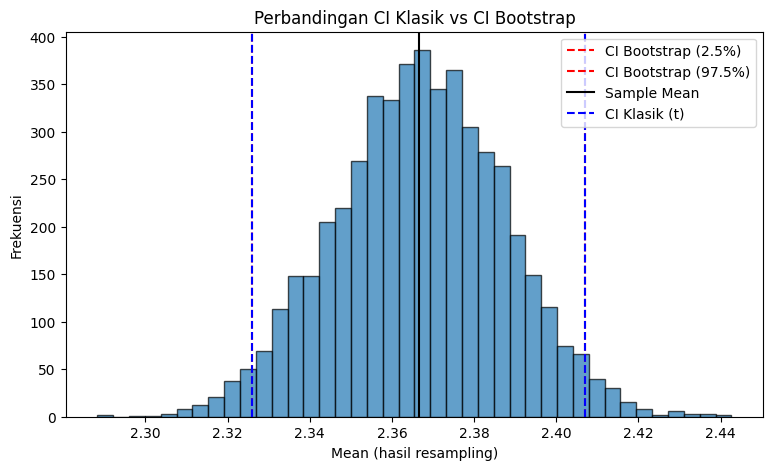

In [20]:
data = df['Ash'].values
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=1)

# CI klasik (berdasarkan CLT & standard error)
alpha = 0.05
se = std / np.sqrt(n)
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_classic = (mean - t_crit*se, mean + t_crit*se)

print(f"CI klasik (95%): {ci_classic}")

# CI bootstrap (resampling acak)
boot_means = []
B = 5000  # jumlah bootstrap sample

for _ in range(B):
    sample = np.random.choice(data, size=n, replace=True)
    boot_means.append(np.mean(sample))

boot_means = np.array(boot_means)
ci_boot = np.percentile(boot_means, [2.5, 97.5])

print(f"CI bootstrap (95%): {ci_boot}")

# Visualisasi perbandingan
plt.figure(figsize=(9,5))

# Histogram distribusi bootstrap
plt.hist(boot_means, bins=40, alpha=0.7, edgecolor='k')
plt.axvline(ci_boot[0], color='red', linestyle='--', label='CI Bootstrap (2.5%)')
plt.axvline(ci_boot[1], color='red', linestyle='--', label='CI Bootstrap (97.5%)')

# Mean & CI klasik
plt.axvline(mean, color='black', linestyle='-', label='Sample Mean')
plt.axvline(ci_classic[0], color='blue', linestyle='--', label='CI Klasik (t)')
plt.axvline(ci_classic[1], color='blue', linestyle='--')

plt.title("Perbandingan CI Klasik vs CI Bootstrap")
plt.xlabel("Mean (hasil resampling)")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

Bootstrap SE of Mean: 0.020773233895116268
Bootstrap SE of Std: 0.01848275305513831


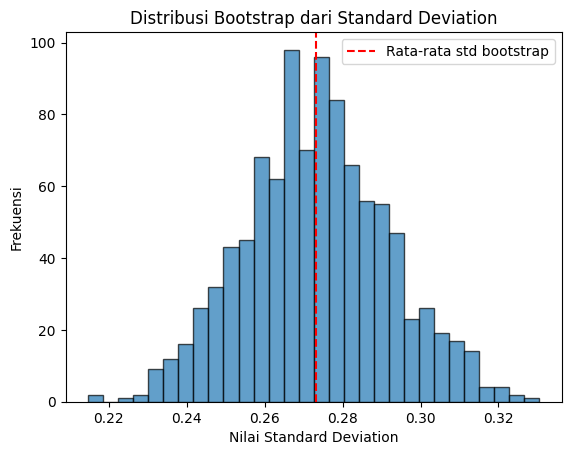

In [ ]:
# Standar error versi bootstrap
B = 1000

boot_means = []
boot_stds = []

for _ in range(B):
    sample = np.random.choice(data, size=len(data), replace=True)
    boot_means.append(np.mean(sample))
    boot_stds.append(np.std(sample, ddof=1))

boot_means = np.array(boot_means)
boot_stds = np.array(boot_stds)

print("Bootstrap SE of Mean:", np.std(boot_means, ddof=1))
print("Bootstrap SE of Std:", np.std(boot_stds, ddof=1))

plt.hist(boot_stds, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.mean(boot_stds), color='red', linestyle='--', label='Rata-rata std bootstrap')
plt.title('Distribusi Bootstrap dari Standard Deviation')
plt.xlabel('Nilai Standard Deviation')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

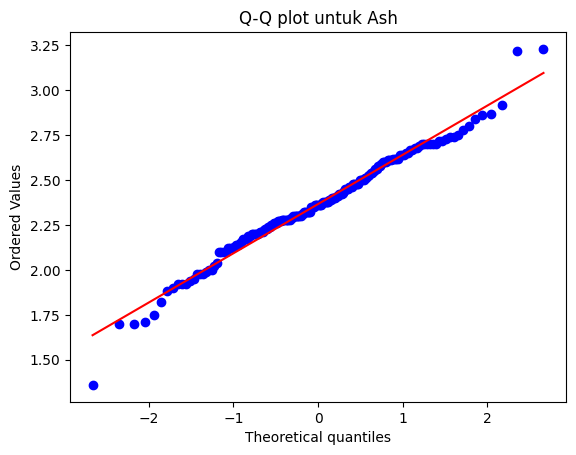

In [ ]:
# Normal distribusi dengan Quantile-Quantile plot (Q-Q Plot)
stats.probplot(df['Ash'], dist='norm', plot=plt)
plt.title("Q-Q plot untuk Ash")
plt.show()

# Q-Q plot digunakan untuk melihat distribusi suatu data (biasanya distribusi normal)
# Kalau titik-titik di data lurus sesuai garis, maka data adalah normal
# Kalau titik-titiknya melengkung ke atas/bawah berarti ada kemiringan
# Kalau titik-titiknya keluar jauh dari ujung-ujung berarti ada outlier

# Terlihat bahwa Ash ada outlier di bagian kanan atas dan kiri bawah
# Datanya di akhir cenderung keluar garis yang berarti kemungkinan tidak normal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


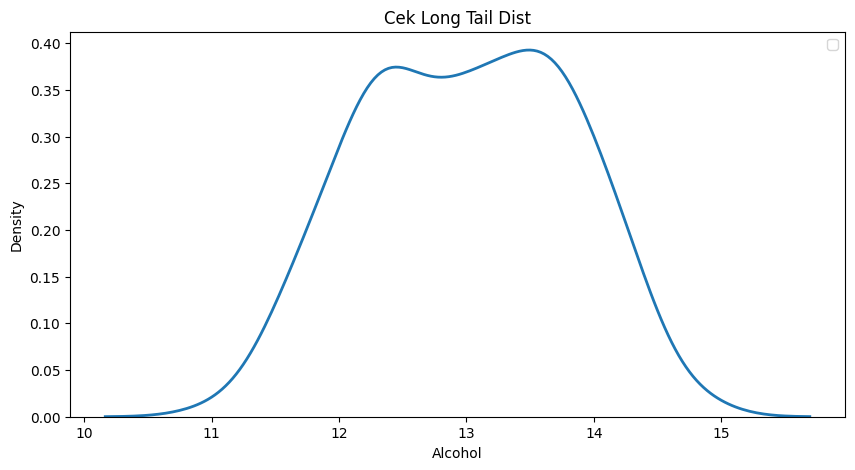

In [ ]:
# Cek distribusi long tail menggunakan kdeplot
data = df['Alcohol']

plt.figure(figsize=(10,5))
sns.kdeplot(data, linewidth=2)
plt.title('Cek Long Tail Dist')
plt.legend()
plt.show()

# Long tail distribution adalah distribusi yang punya ekor panjang di salah satu sisi (biasanya kanan)
# Kalau ada ekor panjang di salah satu sisi, berarti kemungkinan besar ada nilai ekstrem (outlier)

# Jika kedua sisi simetris menurut cepat (curam) maka kurva dianggap normal
# Jika ada salah satu menurun lambat (tidak curam), berarti kemungkinan ada outlier

# Di sini terlihat kedua sisi simetris dan curam. berarti data-nya normal

In [ ]:
# Import library yang dibutuhkan
from scipy.stats import f, t, norm, binom, chi2, poisson

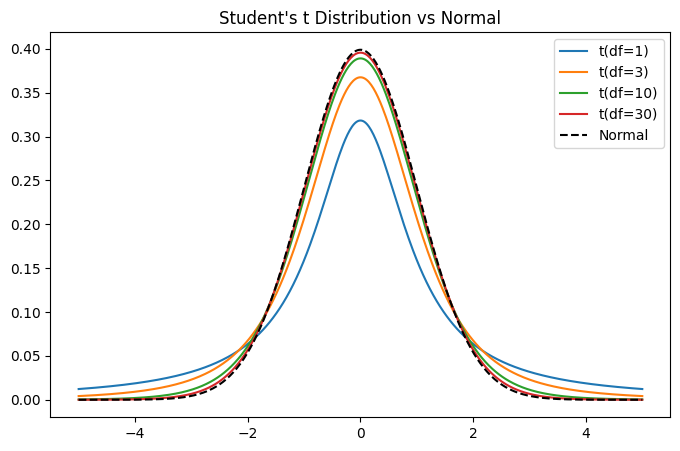

In [ ]:
# Cek distribusi student's t
x = np.linspace(-5, 5, 500)
plt.figure(figsize=(8,5))

for dfree in [1, 3, 10, 30]:
    plt.plot(x, t.pdf(x, dfree), label=f"t(df={dfree})")

plt.plot(x, norm.pdf(x, 0, 1), 'k--', label="Normal")
plt.title("Student's t Distribution vs Normal")
plt.legend()
plt.show()

# Distribusi ini akan muncul jika varian populasi tidak diketahui dan sampelnya kecil
# Mirip kurva normal tapi lebih toleran terhadap outlier
# semakin besar df (degree of freedom), maka data semakin mendekati normal
# kalau df kecil maka ekor akan semakin tebal, dan bisa diindikasikan banyak outlier

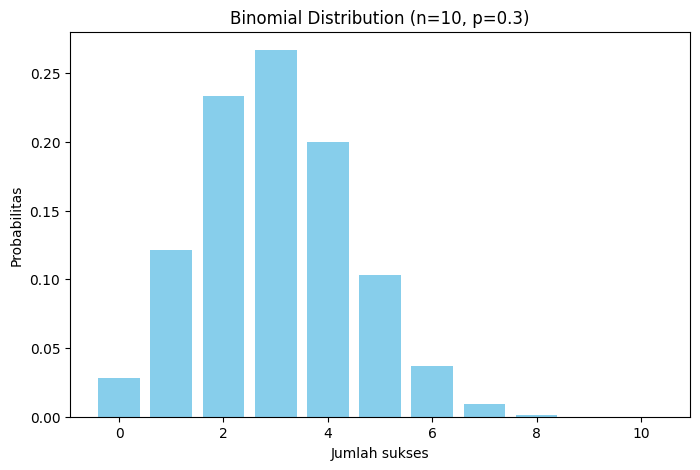

In [ ]:
# Cek distribusi binomial
n, p = 10, 0.3
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.figure(figsize=(8,5))
plt.bar(x, y, color='skyblue')
plt.title("Binomial Distribution (n=10, p=0.3)")
plt.xlabel("Jumlah sukses")
plt.ylabel("Probabilitas")
plt.show()

# Distribusi binomial menggambarkan jumlah keberhasilan dalam sejumlah percobaan independen (n) dengan peluang sukses (p)
# Sumbu X = jumlah keberhasilan
# Sumbu Y = Peluang berhasilnya

# Semakin besar n, distribusi makin mirip normal

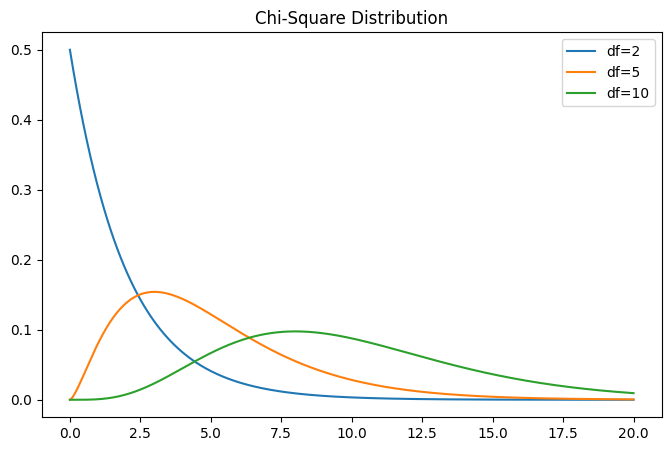

In [ ]:
# Cek distribusi chi-square
x = np.linspace(0, 20, 500)
plt.figure(figsize=(8,5))

for dfree in [2, 5, 10]:
    plt.plot(x, chi2.pdf(x, dfree), label=f"df={dfree}")

plt.title("Chi-Square Distribution")
plt.legend()
plt.show()

# Banyak dipakai untuk uji kesesuaian (goodness-of-fit), uji independensi antar kategori, dan variansi dan uji hipotesis populasi
# distribusi ini hanya berlaku positif karena kuadrat
# Semakin kecil df (degree of freedom), maka semakin ke kiri
# Semakin besar df maka semakin simetris dan semakin mendekati normal

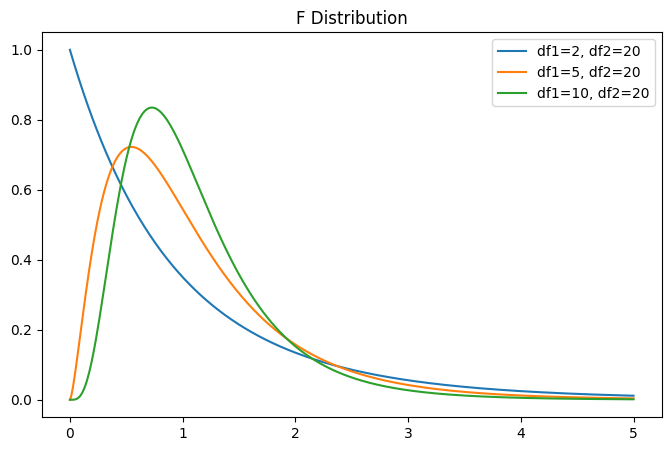

In [ ]:
# Cek distribusi f
x = np.linspace(0, 5, 500)
plt.figure(figsize=(8,5))

for (df1, df2) in [(2,20), (5,20), (10,20)]:
    plt.plot(x, f.pdf(x, df1, df2), label=f"df1={df1}, df2={df2}")

plt.title("F Distribution")
plt.legend()
plt.show()

# Distribusi F adalah rasio antara dua variansi independen yang masing-masing mengikuti x^2/df
# Biasanya digunakan untuk ANOVA(membandingkan variansi antar 2 kelompok), dan uji variansi populasi
# Semakin tinggi df maka semakin simetris dan distribusi mendekati normal

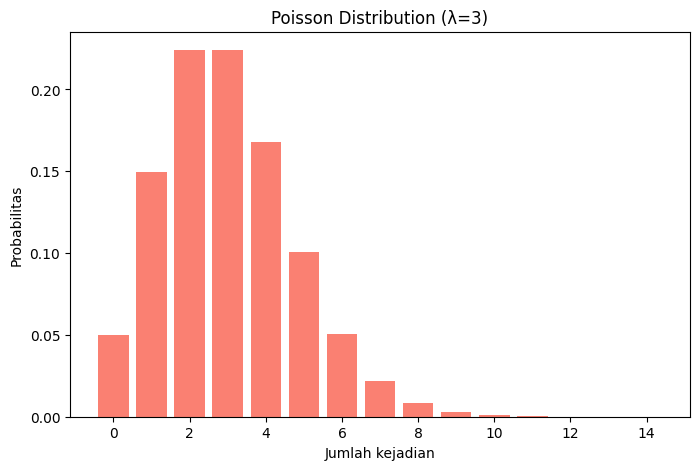

In [ ]:
# Cek distribusi poisson
lam = 3
x = np.arange(0, 15)
y = poisson.pmf(x, lam)

plt.figure(figsize=(8,5))
plt.bar(x, y, color='salmon')
plt.title("Poisson Distribution (λ=3)")
plt.xlabel("Jumlah kejadian")
plt.ylabel("Probabilitas")
plt.show()

# Distribusi poisson menggambarkan jumlah kejadian dalam suatu interval waktu atau ruang, dengan rata-rata lambda
# Jika ekor kanan pendek berarti terlalu banyak nilai di sekitar lambda
# jika lambda besar, maka data semakin ke normal

In [ ]:
# Import library untuk melakukan A/B Testing
from statsmodels.stats.proportion import proportions_ztest

# Proporsi
# Proporsi adalah cara untuk menunjukan bagian dari keseluruhan dalam bentuk perbandingan atau persentasi
# Rumusnya: Proporsi =  Jumlah kejadian/Total kejadian
# Contoh:
# dari 100 pelanggan, 40 membeli produk, maka proporsinya -> 40/100=0.4, yang berarti 40% pelanggan membeli
# dari 500 komponen, 25 cacat, maka proporsinya -> 25/500=0.05, yang berarti 5% cacat

# A/B testing adalah eskperimen statistik untuk membandingkan 2 versi dari sesuatu (misal: 2 versi halaman web, 2 teks iklan, 2 algoritma)
# Untuk melihat mana yang lebih baik (Apakah A atau B)
# Kata A/B artinya, A->Control grup atau versi lama/standar. B-> Treatment grup atau versi baru/ versi yang ingin diuji

# Tujuan A/B Testing adalah:
# 1. -> Sebelum mengubah sesuatu, kamu ingin tahu apakah perubahan itu benar-benar baik
# 2. -> Tidak semua perubahan membawa hasil baik, A/B testing mencegah keputusan berdasarkan asumsi atau intuisi semata
# 3. -> A/B test memberikan bukti statistik, bukan sekedar opini

# Elemen dalam A/B testing:
# Control Group (A) -> Kelompok tanpa perubahan (baseline)
# Treatment Group (B) -> Kelompok yang mendapat perubahan
# Randomisasi -> Pengguna dibagi secara acak, agar hasil tidak bias
# Apa yang diukur -> Bisa klik, waktu, pembelian, situs, cacat, etc.
# Significance testing -> Metode statistik untuk menentukan apakah perbedaan hasilnya benar-benar nyata, atau cuman kebetulan
# P-Value dan Confidence level -> nilai probabilitas untuk menilai signifikansi hasil (biasanya p < 0,05 dianggap signifikan)

# Contoh nyata:
# Ilmuwan ingin menguji 2 obat, obat A adalah obat lama, obat B adalah obat baru
# jika obat B sembuh lebih cepat secara statistik maka bisa disimpulkan bahwa obat terbaru lebih efektif

# Uji hipotesis adalah proses statistik untuk mengambil keputusan berdasarkan data - apakah ada cukup bukti untuk mendukung suatu claim atau tidak
# Bagaikan kita bertanya seperti: "Apakah perbedaan yang saya lihat antara grup A dan B benar-benar nyata, atau hanya kebetulan?"

# Null hypothesis atau hipotesis nol adalah pernyataan tidak ada efek atau tidak ada perbedaan antara 2 kelompok
# Alternative hypothesis atau hipotesis 1 adalah pernyataan ada efek atau ada perbedaan antara 2 kelompok

# 2 Jenis uji hipotesis
# Hipotesis 2 arah -> Menguji apakah ada perbedaan, baik naik maupun turun. digunakan jika hanya ingin tahu apakah B berbeda tanpa arah tertentu
# Contoh: Apakah tombol hijau menghasilkan konversi berbeda dari tombol biru (bisa lebih besar atau lebih kecil)
# 
# Hipotesis 1 arah (kanan) -> Menguji apakah ada perbedaan(naik). digunakan jika kamu yakin perubahan seharusnya menaikkan hasil
# Contoh: Apakah tombol hijau meningkatkan konversi dibandinh tombol biru 
#
# Hipotesis 1 arah (kiri) -> Menguji apakah ada perbedaan(turun). digunakan jika kamu ingin tahu apakah hasil menurun
# Contoh: Apakah tombol hijau menurunkan konversi dibanding tombol biru 

In [4]:
# Import datanya
ab = pd.read_csv(r"C:\Users\Robyi\OneDrive\Documents\Data Science Dataset\page.csv")
ab.drop(columns=['user_id','timestamp'], inplace=True)
ab.head()

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
2,treatment,new_page,0
3,treatment,new_page,0
4,control,old_page,1


In [7]:
# EDA sederhana
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   group         294478 non-null  object
 1   landing_page  294478 non-null  object
 2   converted     294478 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.7+ MB


In [ ]:
# Bersihkan Datanya
mis_match = ab.query(
    "(group == 'treatment' and landing_page == 'old_page') or \
        (group == 'control' and landing_page == 'new_page')"
)

print(f"jumlah baris mismatch:{len(mis_match)}")

# Untuk cek kesalahan grup
# Misal treatment harusnya grup new page bukan old page
# begitu juga control, harusnya old page bukan new page

jumlah baris mismatch:3893


In [9]:
# Hapus kesalahan grup
ab = ab.drop(mis_match.index)

In [ ]:
# Lakukan pehitungan statistik
conversion_rate = ab.groupby('group')['converted'].agg(['mean','count','sum']) # Hitung convertion rate per grup
conversion_rate.rename(columns={'mean':'conversion_rate'}, inplace = True) # rename mean manjadi convertion rate
print(conversion_rate)

# Bisa dilihat control convertion ratenya 0.12 atau 12 persen
# Treatment convertion ratenya 0.118 alias 11.8 persen
# Treatment sedikit lebih rendah tapi apakah signifikan secara statistik?

success = conversion_rate['sum'].values # Jumlah converted
nobs = conversion_rate['count'].values # Jumlah user di tiap grup

print(f'sukses: {success}')
print(f'nob: {nobs}')

# p1 = proporsi dari control karena di urutan pertama
# p2 = proporsi dari treatment karena urutan kedua

success_rev = conversion_rate.loc[['treatment', 'control'],'sum'].values # Di balik, kalau kita ingin menguji grup B
nobs_rev = conversion_rate.loc[['treatment','control'],'count'].values # Sama, dibalik

print(f'sukses reverse: {success_rev}')
print(f'nob reverse: {nobs_rev}')

# Logika urutan:
# Apakah new page lebih baik? -> urutan [Treatment, Control] -> z_right, p_right = proportions_ztest(success_rev, nobs_rev, alternative ='larger')
# Apakah old page lebih baik? -> urutan [Control, Treatment] -> z_right, p_right = proportions_ztest(success, nobs, alternative ='larger')
# Apakah new page lebih buruk? -> urutan [Treatment, Control] -> z_left, p_left = proportions_ztest(success_rev, nobs_rev, alternative ='smaller')
# Apakah old page lebih buruk? -> urutan [Control, Treatment] -> z_left, p_left = proportions_ztest(success, nobs, alternative ='smaller')
# Bebas: Apakah old page/new page lebih baik/leih buruk? -> z_right, p_right = proportions_ztest(success, nobs, alternative ='two-sided') # bebas

           conversion_rate   count    sum
group                                    
control           0.120386  145274  17489
treatment         0.118807  145311  17264
sukses: [17489 17264]
nob: [145274 145311]
sukses reverse: [17264 17489]
nob reverse: [145311 145274]


In [ ]:
# Uji Z-test
z_stat, p_val = proportions_ztest(success, nobs, alternative='two-sided') # Lakukan two-proportions z-test

print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05

if p_val < alpha:
    print("Tolak H0: ada perbedaan signifikan antara control dan treatment") # Tolak H0 alias menerima H1 berarti ada perbedaan
else:
    print("Terima H0: Tidak ada perbedaan signifikan") # Menerima H0 alias menolah H1 berarti ada perbedaan

# Bisa dilihat bahwa grup A dan B tidak signifikan secara statistik
# Yang berarti bahwa tidak ada bukti kuat bahwa new_page(treatment/Grup B) tidak lebih baik atau lebih buruk dari pada old_page(control/Grup A)

Z-Statistic: 1.312
P-value: 0.1897
Terima H0: Tidak ada perbedaan signifikan


In [18]:
# Melihat confidence interval
p1 = conversion_rate.loc['control', 'conversion_rate'] # P1 control karena urutan pertama kita control, jika ingin menguji new_page saja maka P1 ganti ke 'treatment'
p2 = conversion_rate.loc['treatment', 'conversion_rate'] # vice versa

# Standard Error
se = np.sqrt(p1*(1-p1)/nobs[0] + p2*(1-p2)/nobs[1])

# 95% CI
ci_bawah = (p2-p1) - 1.96*se
ci_atas = (p2-p1) + 1.96*se

print(f"\nSelisih konversi (p_new - p_old): {p2-p1:.5f}")
print(f'95% Confidence Interval: [{ci_bawah:.5f}, {ci_atas:.5f}]')


Selisih konversi (p_new - p_old): -0.00158
95% Confidence Interval: [-0.00394, 0.00078]


In [ ]:
# Resampling adalah teknik di mana kita membuat ulang(menyampel ulang) data yang sudah kita punya untuk memperkirakan distribusi statistik tertentu(mean, corr, diff)
# Tujuannya adalah untuk mengukur ketidakpastian atau menguji hipotesis tanpa asumsi distribusi normal

# Ada dua jenis resampling, yaitu:
# Bootstrap -> Mengukur ketidakpastian (CI, SE), dengan metode pengembalian (replacement)
# Permutation test -> Menguji signifikansi antara 2 grup, tanpa metode pengembalian, tapi mengacak label grup

# Permutation test, pada dasar-nya, bayangkan kita punya 2 grup yaitu grup A(old_page/control) dan grup B(new_page/treatment)
# Apakah perbedaan rata-rata (atau proporsi) antara A dan B benar-benar signifikan, atau hanya kebetulan?
# Ide dasarnya, kalau tidak ada efek nyata, maka label "A" dan "B" sebenarnya tidak berarti apa-apa
# Jadi, jika kita bisa acak labelnya, hitung ulang selisih rata-rata, dan lihat seberapa sering terjadi perbedaan "acak" itu terjadi
# Kalau hasil asli lebih ekstrem dari kebanyakan hasil acak, berarti efeknya signifikan

# Jadi contohnya: kita ada data -> A[5,10,25], B[6,12,8]
# Permutation pertama -> A[5,8,12], B[25,10,6] -> hitung rata-rata dan bandingkan selisih rata-ratanya
# Permutation kedua -> A[12,25,5], B[6,8,10] -> sama hitung rata-rata dan bandingkan selisih rata-ratanya
# Terus sampai iterasi selesai

In [19]:
# Contoh kasus
# Grup A(old page/control): rata-rata waktu di halaman 35 detik
# Grup B(new page/treatment): rata-rata waktu di halaman 42 detik
# Apakah peningkatan ini signifikan?

np.random.seed(42)

# Data waktu kunjungan dalam detik
control = np.random.normal(35,5,100) # 100 user di old page
treatment = np.random.normal(42,5,100) # 100 user di new page

# Observasi difference
obs_diff = treatment.mean() - control.mean()

print(f'Data Control: {control}')
print(f'Data Treatment: {treatment}')
print(f'Observasi Difference: {obs_diff:.2f}')

Data Control: [37.48357077 34.30867849 38.23844269 42.61514928 33.82923313 33.82931522
 42.89606408 38.83717365 32.65262807 37.71280022 32.68291154 32.67135123
 36.20981136 25.43359878 26.37541084 32.18856235 29.9358444  36.57123666
 30.45987962 27.93848149 42.32824384 33.8711185  35.33764102 27.87625907
 32.27808638 35.55461295 29.24503211 36.87849009 31.99680655 33.54153125
 31.99146694 44.26139092 34.93251388 29.71144536 39.11272456 28.89578175
 36.04431798 25.20164938 28.35906976 35.98430618 38.6923329  35.85684141
 34.42175859 33.49448152 27.60739005 31.40077896 32.69680615 40.28561113
 36.71809145 26.18479922 36.62041985 33.0745886  31.61539    38.05838144
 40.15499761 39.6564006  30.80391238 33.45393812 36.65631716 39.87772564
 32.60412881 34.07170512 29.46832513 29.01896688 39.06262911 41.78120014
 34.63994939 40.01766449 36.80818013 31.77440123 36.80697803 42.69018283
 34.8208698  42.82321828 21.90127448 39.10951252 35.43523534 33.50496325
 35.45880388 25.06215543 33.90164056 

In [20]:
# Gabungkan semua data
combined = np.concatenate([control, treatment])

P-value: 0.0000


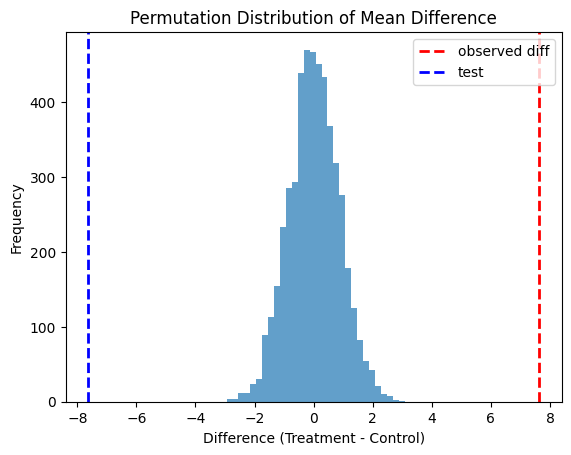

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


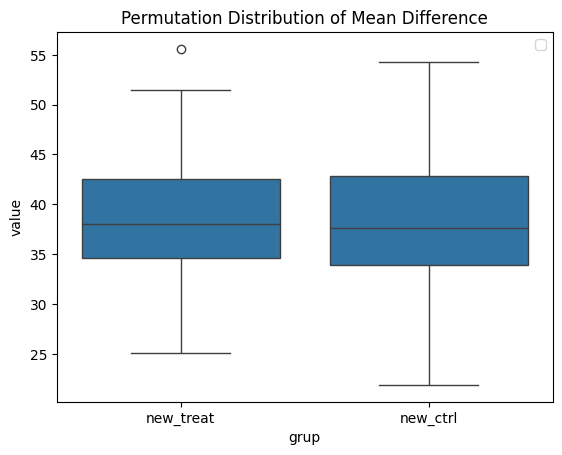

In [34]:
# Lakukan permutation test
n_repeats = 5000
diffs = []
for _ in range(n_repeats):
    np.random.shuffle(combined)
    new_treat = combined[:len(treatment)]
    new_ctrl = combined[len(treatment):]
    diffs.append(new_treat.mean() - new_ctrl.mean())

# Hitung p-value (dua arah)
p_value = np.mean(np.abs(diffs) >= abs(obs_diff))
print(f"P-value: {p_value:.4f}")

# Visualisasi distribusi hasil acak

plt.hist(diffs, bins=30, alpha=0.7)
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=2,label='observed diff')
plt.axvline(-obs_diff, color='blue', linestyle='dashed',linewidth=2, label='test')
plt.title('Permutation Distribution of Mean Difference')
plt.xlabel('Difference (Treatment - Control)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

data = pd.DataFrame({
    'grup': ['new_treat'] * len(new_treat) + ['new_ctrl'] * len(new_ctrl),
    'value':np.concatenate([new_treat, new_ctrl])
})

sns.boxplot(x='grup',y='value', data=data)
plt.title('Permutation Distribution of Mean Difference')
plt.legend()
plt.show()

In [ ]:
# Contoh: web stickiness
# Kita ingin tahu apakah pengguna website yang login lebih sering kembali dibandingkan yang tidak login
# Misalkan kita punya data "proporsi hari dikunjungi ulang" (semakin tinggi, semakin lengket)

np.random.seed(42)
logged_in=np.random.beta(5,2,100)
guest=np.random.beta(2,5,100)

obs_diff = logged_in.mean() - guest.mean()
combined = np.concatenate([logged_in,guest])

n_repeats = 5000
diffs=[]

for _ in range(n_repeats):
    np.random.shuffle(combined)
    new_login = combined[:len(logged_in)]
    new_guest = combined[len(logged_in):]
    diffs.append(new_login.mean() - new_guest.mean())

# Hitung p-value (dua arah)
p_value = np.mean(np.abs(diffs) >= abs(obs_diff))
print(f'Observed Difference: {obs_diff:.6f}')
print(f"P-value: {p_value:.4f}")

# Dapat dilihat bahwa P value < 0,05 yang berarti pengguna yang login benar-benar lebih "lengket" dibanding tamu

Observed Difference: 0.433088
P-value: 0.0000


In [7]:
# Significance Testing and P-value
# Significance Testing adalah ukuran untuk menilai apakah hasil yang kita lihat dalam data cukup "luar biasa" sehingga kita layak menolak asumsi H0
# Ini memberi dasar keputusan, apakah efek yang teramati kemungkinan besar nyata atau hanya kebetulan karena variasi simpel
# P-value adalah alat atau kriteria yang umum dipakai untuk mengukur seberapa konsisten data dengan H0
# Jadi, P-value adalah angka yang membantu menilai signifikansi statistik

# Alpha, tingkat kepercayaan dan tingkat signifikansi
# Alpha adalah treshold yang ditentukan sebelum uji untuk memutuskan apakah menolak H0
# Yang sering di pakai: 0.05, 0.01, dan 0.10

# Type 1 dan type 2 error
# Type 1 error(alpha) -> menolak H0 padahal H0 benar. contoh: mengklaim obat efektif padahal tidak efektif
# Type 2 error(beta) -> gagal menolak H0 padahal H1 benar. contoh: Menyatakan obat tidak efektif padahal efektif
#
# Power (kekuatan uji) -> (1-beta), ini adalah probabilitas uji mendeteksi efek ketika efek itu nyata
# Faktor yang mempengaruhi alpha, beta, dan power:
# Alpha dipengaruhi oleh peneliti
# Beta dan power dipengaruhi oleh ukuran sampel (n), besar efek sebenarnya (effect size), dan variabilitas data (standar deviasi)
# jika n besar maka power naik (alias beta turun)
# jika effect size besar maka power naik
# jika variabilitas kecil maka power naik

# Alpha - false alarm
# Alpha adalah peluang kita menolak H0 padahal H0 benar
# H0 biasanya -> "proses masih normal" atau "tidak ada perubahan kualitas"
# Jadi, alpha adalah resiko kita mengira ada malasah, padahal prosesnya baik-baik saja
# Anda uji rata-rata diameter bearing = 10mm, H0:mu=10mm, alpha = 0.05 -> berarti anda siap menerima risiko 5% salah alarm
# Jika proses sebenarnya tidak berubah, ada 5% kemungkinan anda tetap teriak "alarm" dan menghentikan produksi tanpa alasan nyata
# Analogi -> Operator kadang menghentikan mesin karena control chart melewati batas, padahal itu hanya variasi acak

# Beta - risiko gagal mendeteksi masalah
# Beta adalah peluang kita gagal menolak H0 padahal H1 benar
# Artinya, ada kegagalan tapi kita tidak menyadarinya
# Misal, proses sebenarnya sudah bergeser(misal mean diameter 10mm naik menjadi 10.20mm), tapi karena sampel kecil / variasi tinggi, maka jadinya tidak "signifikan"
# Analogi -> Produk sebenarnya sudah keluar toleransi, tapi control chart masih dalam batas aman

# Power (1-beta) - kemampuan sistem mendeteksi kita
# Power artinya peluang berhasil mendeteksi perubahan yang nyata
# atau bahasanya -> seberapa sensitif sistem QC kita untuk mendeteksi pergeseran kualitas yang penting?
# Misal -> kita ingin tahu apakah perubahan suhu furnace membuat diameter baut berubah -> anda rancang uji a=0.05, dan hasil menunjukan bahwa power =0.80
# Artinya: jika perubahan diameter memang ada, anda punya peluang 80% untuk mendeteksinya
# Power rendah -> uji tidak sensitif -> banyak perubahan nyata terlewat
# Power tinggi -> uji lebih peka terhadap perubahan proses

# Effect size - seberapa besar perubahan yang penting secara praktis
# Effect size artinya ukuran perbedaan nyata antara kondisi lama (H0) dan kondisi baru (H1)
# Artinya: seberapa besar pergeseran kualitas yang layak disebut penting secara industri
# Contoh: target diamater bearing adalah 10mm
# kondisi lama mean=10mm, kondisi baru1 mean=10.05mm(perbedaan dengan kondisi lama = 0.05mm), kondisi baru2 mean=10.20mm(perbedaan dengan kondisi lama = 0.20mm)
# Kalau standar deveiasinya 0.25mm maka -> Cohen'd=(mean kondisi lama - mean kondisi baru)/Sp(standar deviasi gabungan)
# Misal standar deviasi gabungan 0.25mm
# Maka: 0.05/0.25=0.2(efek kecil), 0.20/0.25=0.8(efek besar)

import statsmodels.stats.api as sms

In [2]:
# 1. Ambil datanya
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
# 2. Lihat kolom numerik & label
print(df.info())
print(df['Outcome'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Outcome
0    500
1    268
Name: count, dtype: int64


In [3]:
# Misalnya kita ambil kolom numerik “feature1” sebagai variabel yang dibandingkan
# Atau jika ada kolom proses seperti “temperature”, “pressure”, dll.
feature = 'BloodPressure' 
# ganti dengan nama kolom numerik yang relevan
group0 = df[df['Outcome'] == 0][feature].dropna()
group1 = df[df['Outcome'] == 1][feature].dropna()

print(group0)
print(group1)

1      66
3      66
5      74
7       0
10     92
       ..
762    62
763    76
764    70
765    72
767    70
Name: BloodPressure, Length: 500, dtype: int64
0      72
2      64
4      40
6      50
8      70
       ..
755    88
757    72
759    92
761    74
766    60
Name: BloodPressure, Length: 268, dtype: int64


In [ ]:
# 3. Hitung effect size — Cohen’s d
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    # pooled standard deviation
    pooled_std = np.sqrt(((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohen_d(group1, group0)
print(f"Cohen's d (group1 vs group0): {d}")

# Terlihat skor cohen's d antara grup 1 dan 2 adalah 0.13
# Yang artinya, perbedaan mean antara kedua grup hanya sedikit, sekitar 0.13 standar deviasi
# karena: 0.0-0.2(efek sangat kecil), 0.2-0.5(efek kecil), 0.5-0.8(efek sedang), >0.8(efek sangat besar)
# Jadi kedua grup hampir tidak berbeda pada variabel bloodpressure
# Kemungkinan variabel BP tidak berguna untuk membedakan antara grup0 dan grup1
# Walaupun p-value < 0.05(signifikan), tapi perbedaannya tidak bermakna secara praktis

Cohen's d (group1 vs group0): 0.1366261350836698


In [ ]:
# 4. Uji t (dua sampel, asumsikan varians sama atau tidak sama)
tstat, pvalue = stats.ttest_ind(group1, group0, equal_var=False)
print("t-statistic:", tstat)
print("p-value:", pvalue)

# Terlihat grup0 dan grup1 tidak ada bukti perbedaan signifikan
# Alias sama rata-ratanya

t-statistic: 1.7130865949770784
p-value: 0.08735424821461578


In [ ]:
# 5. Hitung power (untuk uji dua sampel)
# Gunakan statsmodels untuk power analysis
effect = d  # kita pakai effect size d sebagai input
alpha = 0.05
power_analysis = sms.TTestIndPower()
# hitung ukuran sampel yang ideal untuk power = 0.8
n_needed = power_analysis.solve_power(effect_size=0.641366, power=0.8, alpha=alpha, ratio=1.0, alternative='two-sided')
print(f"Jumlah sampel yang diperlukan per grup agar power = 0.8: {n_needed:.1f}")

# supaya effect size tinggi, maka grup 1 butuh 39 sampel dan grup0 juga sama
# sehingga effect size bisa tinggi

Jumlah sampel yang diperlukan per grup agar power = 0.8: 39.1


In [ ]:
# Hitung power aktual dengan n observed
nobs1 = len(group1)
nobs2 = len(group0)
power_actual = power_analysis.power(effect_size=effect, nobs1=nobs1, alpha=alpha, ratio=nobs2/nobs1, alternative='two-sided')
print(f"Power aktual dari data saat ini: {power_actual}")

# power saat ini hanya 0.43, sangat kecil

Power aktual dari data saat ini: 0.43749992230862683


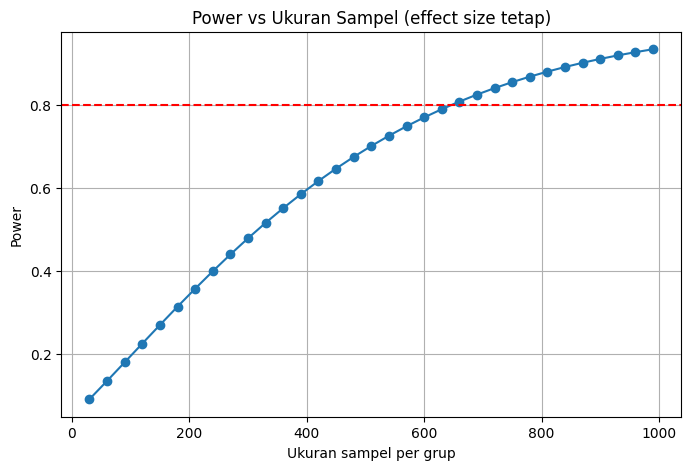

In [ ]:
# 6. Simulasi: bagaimana power berubah jika n diperbesar
ns = np.arange(30, 1000, 30)
powers = [power_analysis.power(effect_size=effect, nobs1=n, alpha=alpha, ratio= (nobs2/nobs1), alternative='two-sided') for n in ns]

plt.figure(figsize=(8,5))
plt.plot(ns, powers, marker='o')
plt.axhline(0.8, color='red', linestyle='--')
plt.xlabel("Ukuran sampel per grup")
plt.ylabel("Power")
plt.title("Power vs Ukuran Sampel (effect size tetap)")
plt.grid(True)
plt.show()

# Terlihat, semakin banyak sampel, maka power semakin besar

In [11]:
# T-Test - Membandingkan dua kondisi atau proses
# Apakah dua kondisi ini berbeda secara signifikan dalam rata-rata hasilnya?
# Jika kita ingin tahu: 
# 1. Apakah rata-rata diameter produk dari mesin A dan B berbeda
# 2. Apakah rata-rata waktu perakitan sebelum dan sesudah training operator berubah
# 3. Apakah tingkat cacat sebelun dan sesudah perbaikan berbeda?
# Jenis ttest:
# One sample ttest: membandingkan rata-rata sampel dengan target tertentu -> apakah rata-rata diameter baut=10mm sesuasi spesifikasi
# independent(two sampel) ttest: membandingkan 2 grup berbeda -> seperti point 1 di atas
# paired t-test: memebandingkan pasanggan data sebelum-sesudah -> seperti point 3 di atas
# Output ttest -> t-statistics: seberapa jauh rata-rata perbedaan dibandingkan variasi acak, dan p-value

# Multiple testing - Bahaya "signifikan palsu" kalau terlalu banyak uji
# Intuisi: kalau anda hanya melakukan 1 uji dengan alpha=0.05. maka peluang salah alarm=5%. Tapi kalau melakukan banyak uji maka peluang salah alarm naik drastis
# Analogi: Bayangkan kita memeriksa 20 parameter proses dengan alpha=0.05 untuk tiap parameter. Walaupun prosesnya stabi, secara kebetulan -
# - 1 dari 20 parameter bisa tampak "berbeda signifikan" -> dan kita bisa salah menyimpulkan penyebab cacat
# Jadi ketika kita melakukan uji statistik secara bersamaan. maka kita meningkatkan peluang false discovery (penemuan palsu)
# solusi: Bonferroni Correction dan False Discovery Rate (FDR)

# Degree of Freedom (ddof) - Seberapa banyak informasi bebas tersedia
# Artinya, jumlah data yang bervariasi secara bebas tanpa melanggar aturan atau constraint
# Misal kita punya 3 data: [x1,x2,x3] dan rata-ratanya = 10
# Berarti, x1, dan x2 bebas nilainya berapa saja asalkan x3 harus menyesuaikan agar rata-rata tetap 10
# ddof mempengaruhi distribusi t (ddof kecil -> distribusi t lebih lebar -> pvalue lebih besar -> lebih sulit signifikan)
# semakin besar n -> df besar -> distribusi t mendekati normal

import statsmodels.stats.multitest as smm

In [ ]:
# Kita fokus ke kolom numeric untuk contoh
num_cols = ['BMI','Glucose','BloodPressure']

# =====================================
# 🧪 2. T-TEST (Two-sample independent)
# =====================================
diabet = df[df['Outcome'] == 1]['BloodPressure']
normal = df[df['Outcome'] == 0]['BloodPressure']

tstat, pval = stats.ttest_ind(normal, diabet, equal_var=False)
print("\n===== Two-sample t-test: Diabet vs Normal =====")
print(f"t-statistic = {tstat:.3f}")
print(f"p-value     = {pval:.4f}")

if pval < 0.05:
    print("👉 Perbedaan rata-rata signifikan (Perbedaan Tekanan darah berbeda antara diabet vs normal)")
else:
    print("👉 Tidak ada perbedaan signifikan, diabet vs normal tekanan darahnya serupa.")


===== Two-sample t-test: Diabet vs Normal =====
t-statistic = -1.713
p-value     = 0.0874
👉 Tidak ada perbedaan signifikan, diabet vs normal tekanan darahnya serupa.



===== Multiple t-tests: Diabet vs Normal =====
         Feature       p_value
0            BMI  6.566238e-17
1        Glucose  2.644161e-36
2  BloodPressure  8.735425e-02

Setelah koreksi multiple testing:
         Feature       p_value  p_bonferroni         p_FDR
0            BMI  6.566238e-17  1.969871e-16  9.849356e-17
1        Glucose  2.644161e-36  7.932484e-36  7.932484e-36
2  BloodPressure  8.735425e-02  2.620627e-01  8.735425e-02


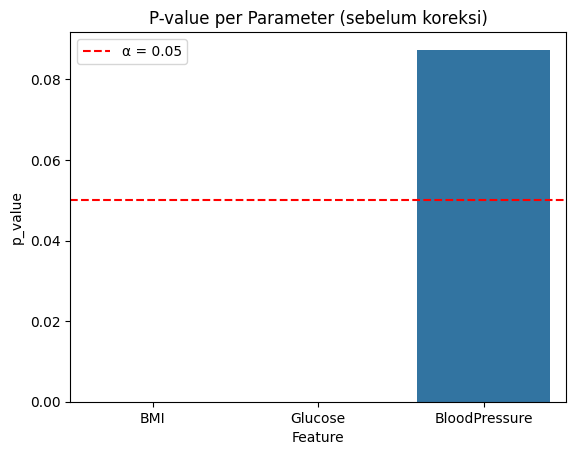

In [ ]:
# =====================================
# 🔁 3. MULTIPLE TESTING
# =====================================
# Lakukan t-test untuk tiap variabel numerik
diabet = df[df['Outcome'] == 1]
normal = df[df['Outcome'] == 0]
pvals = []
for col in num_cols:
    t, p = stats.ttest_ind(diabet[col], normal[col], equal_var=False)
    pvals.append(p)

pvals = np.array(pvals)
results = pd.DataFrame({'Feature': num_cols, 'p_value': pvals})
print("\n===== Multiple t-tests: Diabet vs Normal =====")
print(results)

# Bonferroni correction
bonf_p = smm.multipletests(pvals, alpha=0.05, method='bonferroni')[1]
fdr_p = smm.multipletests(pvals, alpha=0.05, method='fdr_bh')[1]

results['p_bonferroni'] = bonf_p
results['p_FDR'] = fdr_p
print("\nSetelah koreksi multiple testing:")
print(results)

# Tandai yang signifikan
results['Significant (Bonf)'] = results['p_bonferroni'] < 0.05
results['Significant (FDR)'] = results['p_FDR'] < 0.05

sns.barplot(data=results, x='Feature', y='p_value')
plt.axhline(0.05, color='red', linestyle='--', label='α = 0.05')
plt.title('P-value per Parameter (sebelum koreksi)')
plt.legend()
plt.show()

# Multiple Testing:
   # Saat menguji banyak parameter,
     # raw p-value bisa menyesatkan (bisa ada yang 'signifikan' cuma karena kebetulan).
   # Setelah koreksi Bonferroni/FDR, kita lihat parameter mana yang benar-benar penting.

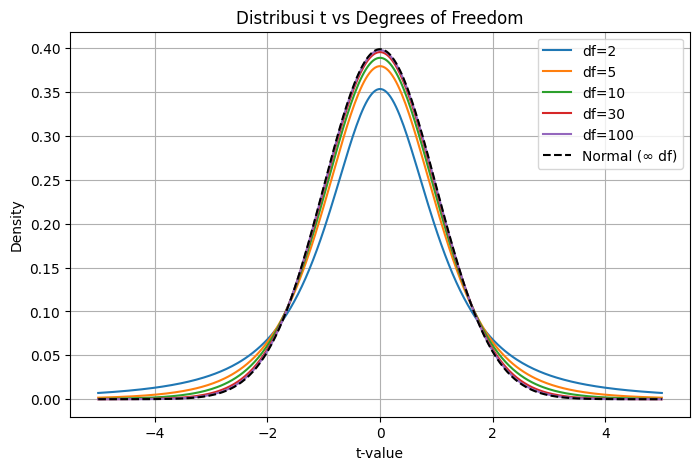

In [ ]:
# =====================================
# 📊 4. DEGREES OF FREEDOM (df)
# =====================================
# Simulasi distribusi t dengan df kecil vs besar

x = np.linspace(-5, 5, 300)
dfs = [2, 5, 10, 30, 100]
plt.figure(figsize=(8,5))

for df in dfs:
    plt.plot(x, stats.t.pdf(x, df), label=f'df={df}')

plt.plot(x, stats.norm.pdf(x, 0, 1), 'k--', label='Normal (∞ df)')
plt.title("Distribusi t vs Degrees of Freedom")
plt.xlabel("t-value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# df kecil → distribusi t lebih 'lebar' → hasil lebih tidak pasti.
# df besar (n besar) → mendekati distribusi normal → hasil makin stabil.

In [ ]:
# ANOVA - Analysis of Variance
# Menjawab pertantaan: "Apakag rata-rata lebih dari 2 grup berbeda secara signifikan"
# Kalau ttest hanya 2 grup maka ANOVA bisa lebih dari 2 grup, tanpa meningkatkan false positive akibat multiple testing

# F-Statistic - Ukuran kekuatan perbedaan
# F besar -> variasi antar grup jauh lebih besar daripada variasi dalam grup -> H0 ditolak (ada perbedaan signifikan)
# F kecil -> variasi antar grup sebanding dengan variasi dalam grup -> H0 gagal ditolak (tidak ada perbedaan signifikan)

# Two-way Anova - Menambah faktor kedua (alias 2 fitur/kolom data tipe kategorik)
# Menjawab:
# Apakah faktor A mempengaruhi kolom numerik?
# Apakah faktor B mempengaruhi kolom numerik?
# Apakah gabungan/interaksi antara faktor A dan B mempengaruhi kolom numerik

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
df = pd.read_excel(r"C:\Users\Robyi\Documents\Data Science Dataset\all.xlsx", sheet_name='titanic')
df.dropna(how='all', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


===== One-way ANOVA: Selamat vs fare =====
F-statistic = 63.031
p-value     = 0.0000
👉 Rata-rata fare berbeda signifikan antara selamat dan tidak selamat


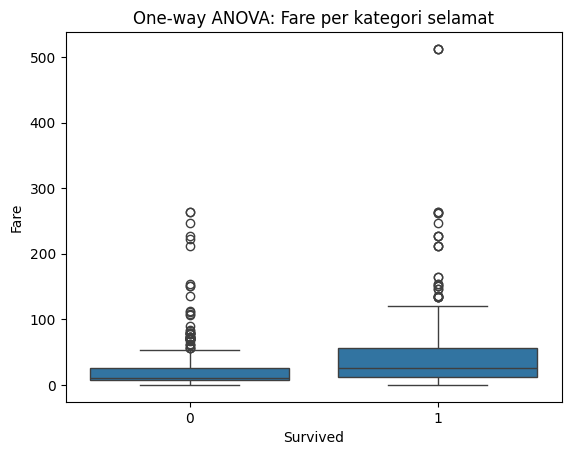

In [29]:
hidup = df[df['Survived'] == 0]['Fare']
mati = df[df['Survived'] == 1]['Fare']

F_stat, p_val = stats.f_oneway(hidup, mati)
print("===== One-way ANOVA: Selamat vs fare =====")
print(f"F-statistic = {F_stat:.3f}")
print(f"p-value     = {p_val:.4f}")

if p_val < 0.05:
    print("👉 Rata-rata fare berbeda signifikan antara selamat dan tidak selamat")
else:
    print("👉 Tidak ada perbedaan signifikan antar selamat dan tidak selamat")

# Visualisasi
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("One-way ANOVA: Fare per kategori selamat")
plt.show()

In [38]:
# =====================================
# 1️⃣ Contoh dataset
# =====================================
np.random.seed(42)

# Diameter tiap mesin (misal mm)
machine_A = np.random.normal(10.0, 0.5, 15)  # mean=10
machine_B = np.random.normal(10.5, 0.5, 15)  # mean=10.5
machine_C = np.random.normal(11.0, 0.5, 15)  # mean=11

df = pd.DataFrame({
    'Diameter': np.concatenate([machine_A, machine_B, machine_C]),
    'Machine': ['A']*15 + ['B']*15 + ['C']*15
})

# =====================================
# 2️⃣ Fungsi F-statistic
# =====================================
def f_statistic(df, value_col, group_col):
    groups = [df[df[group_col]==g][value_col].values for g in df[group_col].unique()]
    n_groups = len(groups)
    n_total = sum(len(g) for g in groups)
    
    # Mean tiap grup & overall mean
    group_means = [np.mean(g) for g in groups]
    overall_mean = np.mean(np.concatenate(groups))
    
    # Between-group variance
    ss_between = sum(len(g)*(m - overall_mean)**2 for g, m in zip(groups, group_means))
    
    # Within-group variance
    ss_within = sum(sum((x - m)**2 for x in g) for g, m in zip(groups, group_means))
    
    df_between = n_groups - 1
    df_within = n_total - n_groups
    
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    
    F = ms_between / ms_within
    return F

# Hitung F observed
F_obs = f_statistic(df, 'Diameter', 'Machine')
print(f"Observed F-statistic: {F_obs:.3f}")

# =====================================
# 3️⃣ Permutation test
# =====================================
n_permutations = 10000
F_perm = []

for _ in range(n_permutations):
    df_perm = df.copy()
    df_perm['Diameter'] = np.random.permutation(df_perm['Diameter'])
    F_perm.append(f_statistic(df_perm, 'Diameter', 'Machine'))

F_perm = np.array(F_perm)

# Hitung p-value empiris
p_value = np.mean(F_perm >= F_obs)
print(f"Permutation ANOVA p-value: {p_value:.4f}")


Observed F-statistic: 12.985
Permutation ANOVA p-value: 0.0000


In [ ]:
# =====================================
# 3️⃣ Two-way ANOVA (Mesin × Operator vs Diameter)
# =====================================
# Gunakan statsmodels formula API
model = ols('Fare ~ C(Survived) + C(Pclass) + C(Survived):C(Pclass)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # type 2 sum of squares
print("\n===== Two-way ANOVA =====")
print(anova_table)

# Terlihat Survived terhadap Fare = 1.82-03 alias 0.00182 -> Signifikan karena p-value < alpha (0.00182 < 0.05). 
# Berarti perbedaan orang selamat atau tidak ada perbedaan berdasarkan fare

# Terlihat Pclass terhadap Fare = 8.68-75 alias 0.000(sampai 75, 0-nya)8.68 -> Signifikan karena p-value < alpha (0.000000000000....n < 0.05).
# Berarti antar kelas ada perbedaan rata-rata fare

# Gabungan Survived dan Pclass terhadap Fare = 2.46-05 alias 0.0000246 -> Signifikan karena p-value < alpha (0.0000246 < 0.05).
# Efek selamat atau tidak terhadap fare berbeda tergantung kelas mana


===== Two-way ANOVA =====
                             sum_sq     df           F        PR(>F)
C(Survived)            1.516366e+04    1.0    9.772110  1.829623e-03
C(Pclass)              6.456848e+05    2.0  208.053483  8.687480e-75
C(Survived):C(Pclass)  3.332581e+04    2.0   10.738290  2.466646e-05
Residual               1.373279e+06  885.0         NaN           NaN


In [ ]:
# Chi-square test - uji independensi atau goodness-of-fit
# Tujuannya adalah menguji apakah dua variabel kategorik bersifat independen atau tidak.
# Atau apakah distribusi kategori sesuai harapan (goodness-of-fit)

# Dalam manufaktur, variabel kategori misalnya:
# tipe cacat:[pecah, gores, basah]
# supplier:[a,b,c]
# sif:[pagi, sore, malam]
# Pertanyaan contoh: Apakah jenis defect tergantung supplier? -> uji independen
# Apakah distribusi defect mengikuti proporsi yang diharapkan? -> goodness-of-fit

# Contoh analogi:
# 100 produk dari 2 supplier:
# supplier A=20 defect
# supplier B=10 defect
# Jadi, apakah defect tergantung supplier?
# Test chi square membandingkan distribusi observed vs expected jika defect independent dari supplier

# Chi-square test - resampling method
# Resampling: membangkitkan distribusi chi-square melalui simulasi
# Intuisi -> Daripada pakai tabel chi-square teoritis, kita acak ulang data ribuan kali untuk melihat seberapa besar x^2 bisa terjadi secara kebetulan
# Kelebihan:cocok untuk data kecil/kategori jarang,tidak tergantung asumsi besar sampel,bisa menangani sel kosong/frekuensi kecil,empirical pvalue lebih realistis

# Teori chi-square
# Berdasarkan distribusi chi-square -> x^2 ~ x^2(ddof)
# ddof tergantung: goodness-of-fit(ddof=k-1(k=jumlah kategori)), independence(ddof=(rows-1)(cols-1))
# p-value = probabilitas x^2 >_ observed x^2
# H0: variabel independen/distribusi sesuai ekspetasi
# H1: ada ketergantungan/distribusi berbeda

# Fisher Exact test
# Digunakan ketika frekuensi sel kecil (biasanya < 5) -> chi-square tidak akurat
# Contoh tabel 2x2

from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

In [36]:
# =====================================
# 1️⃣ Contoh dataset manufaktur
# =====================================
data = {
    'Supplier': ['A', 'B', 'C'],
    'Defect_Yes': [5, 10, 15],
    'Defect_No':  [25, 20, 15]
}

df = pd.DataFrame(data)
df.set_index('Supplier', inplace=True)
print("Tabel kontingensi:")
print(df)

# =====================================
# 2️⃣ Chi-square test (independence)
# =====================================
chi2, p, dof, expected = chi2_contingency(df)

print("\n===== Chi-square test =====")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies if independent:")
print(pd.DataFrame(expected, index=df.index, columns=df.columns))

# =====================================
# 3️⃣ Interpretasi
# =====================================
if p < 0.05:
    print("\n👉 Hasil signifikan: defect tergantung supplier")
else:
    print("\n👉 Tidak signifikan: defect independen dari supplier")


Tabel kontingensi:
          Defect_Yes  Defect_No
Supplier                       
A                  5         25
B                 10         20
C                 15         15

===== Chi-square test =====
Chi-square statistic: 7.500
p-value: 0.0235
Degrees of freedom: 2
Expected frequencies if independent:
          Defect_Yes  Defect_No
Supplier                       
A               10.0       20.0
B               10.0       20.0
C               10.0       20.0

👉 Hasil signifikan: defect tergantung supplier


In [37]:
# =====================================
# Dataset contoh manufaktur
# =====================================
data = {
    'Supplier': ['A']*30 + ['B']*30 + ['C']*30,
    'Defect':  ['Yes']*5 + ['No']*25 +   # Supplier A
               ['Yes']*10 + ['No']*20 +  # Supplier B
               ['Yes']*15 + ['No']*15    # Supplier C
}

df = pd.DataFrame(data)

# =====================================
# Fungsi hitung chi-square
# =====================================
def chi2_statistic(df, row_col, col_col):
    """Chi-square statistic dari tabel kontingensi"""
    contingency = pd.crosstab(df[row_col], df[col_col])
    observed = contingency.values
    row_sums = observed.sum(axis=1, keepdims=True)
    col_sums = observed.sum(axis=0, keepdims=True)
    total = observed.sum()
    expected = row_sums @ col_sums / total
    chi2 = ((observed - expected)**2 / expected).sum()
    return chi2

# Chi-square observed
chi2_obs = chi2_statistic(df, 'Supplier', 'Defect')
print(f"Chi-square observed: {chi2_obs:.3f}")

# =====================================
# Permutation test
# =====================================
n_permutations = 10000
chi2_perm = []

for _ in range(n_permutations):
    # acak label defect
    df_perm = df.copy()
    df_perm['Defect'] = np.random.permutation(df_perm['Defect'])
    chi2_perm.append(chi2_statistic(df_perm, 'Supplier', 'Defect'))

chi2_perm = np.array(chi2_perm)

# Hitung p-value empiris
p_value_empirical = np.mean(chi2_perm >= chi2_obs)
print(f"Permutation test p-value: {p_value_empirical:.4f}")


Chi-square observed: 7.500
Permutation test p-value: 0.0283


In [35]:
# =====================================
# Contoh 2x2: Supplier A vs B dan defect
# =====================================
# Tabel: [[Defect Yes, Defect No], [Defect Yes, Defect No]]
table = [[5, 25],   # Supplier A
         [10, 20]]  # Supplier B

oddsratio, p_value = fisher_exact(table)
print("\n===== Fisher Exact Test =====")
print(f"Odds ratio: {oddsratio:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("👉 Signifikan: defect tergantung supplier (A vs B)")
else:
    print("👉 Tidak signifikan: defect independen dari supplier (A vs B)")


===== Fisher Exact Test =====
Odds ratio: 0.400
p-value: 0.2326
👉 Tidak signifikan: defect independen dari supplier (A vs B)


In [ ]:
# Multi-Arm Banding (MAB) Algorithm 
# Tujuannya adalah menyelesaikan masalah eksploitasi vs eksplorasi
# "Bagaimana memilih opsi terbaik (arm) sambil tetap mencoba opsi lain unruk menemukan yang optimal?"
# Analogi -> Anda punya n mesin(arm) ingin memaksimalkan total kemenangan

# Masalah inti:
# Eksploitasi -> Pilih mesin yang selama ini menang paling banyak
# Eskplorasi -> Coba mesin lain untuk melihat apakah lebih baik

# Analogi manufaktur:
# Misal 3 lini produksi -> tiap lini punya kemungkinan defect berbeda
# Kita ingin memilih lini terbaik untuk produksi batch berikutnya, tapi juga menguji lini lain untuk memastikan tidak ada yang lebih baik
# MAB membantu memaksimalkan hasil sambil belajar dari data secara adaptif

# Macam-macam algoritma MAB:
# epsilon-greedy: 
# Dengan probabilitas epsilon -> pilih arm secara acak (eksplorasi), dengan probabilitas 1-epsilon -> pilih arm terbaik sejauh ini (eskploitasi)
# Upper Confidence Bound (UCB):
# Memilih arm dengan kombinasi mean reward + ketidakpastian
# Secara otomatis menyeimbangkan eksplorasi dan eksploitasi
# Thompson sampling:
# Pendekatan bayesian -> sampling dari porsterior distribusi reward tiap arm
# Memilih arm denggan probabilitas tinggi

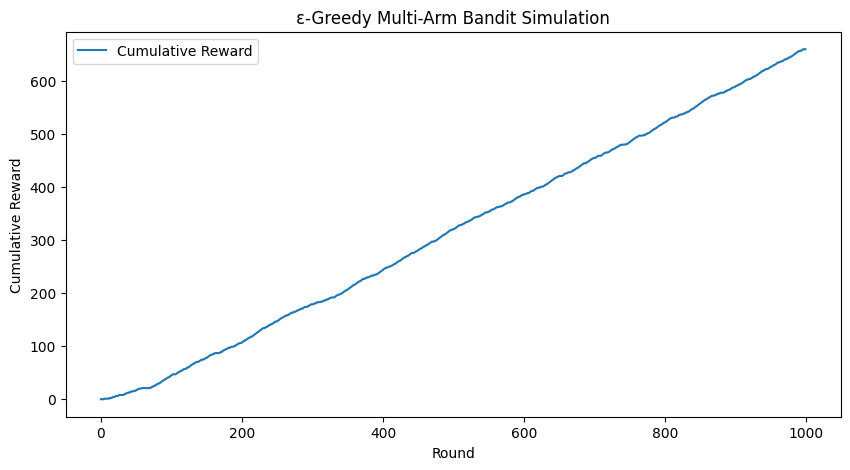

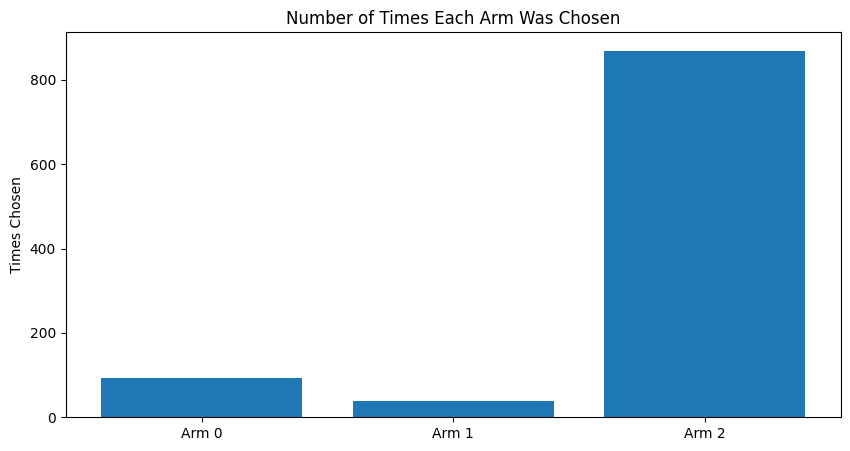

Estimated probabilities: [0.2688172  0.44736842 0.71116226]
True probabilities: [0.3, 0.5, 0.7]


In [39]:
# =====================================
# 1️⃣ Setup: 3 bandit arms dengan probabilitas reward berbeda
# =====================================
true_probs = [0.3, 0.5, 0.7]  # peluang menang tiap arm
n_arms = len(true_probs)
n_rounds = 1000
epsilon = 0.1  # probabilitas eksplorasi

# Track reward & pilihan
rewards = []
chosen_arms = []
estimates = np.zeros(n_arms)  # estimasi mean reward tiap arm
counts = np.zeros(n_arms)     # berapa kali tiap arm dipilih

# =====================================
# 2️⃣ ε-greedy algorithm
# =====================================
for t in range(n_rounds):
    if np.random.rand() < epsilon:
        # eksplorasi
        arm = np.random.randint(n_arms)
    else:
        # eksploitasi
        arm = np.argmax(estimates)
    
    # Dapatkan reward (0 atau 1) dari arm
    reward = np.random.rand() < true_probs[arm]
    
    # Update estimates (running average)
    counts[arm] += 1
    estimates[arm] += (reward - estimates[arm]) / counts[arm]
    
    rewards.append(reward)
    chosen_arms.append(arm)

# =====================================
# 3️⃣ Visualisasi hasil
# =====================================
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(rewards), label='Cumulative Reward')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('ε-Greedy Multi-Arm Bandit Simulation')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(range(n_arms), counts)
plt.xticks(range(n_arms), ['Arm 0', 'Arm 1', 'Arm 2'])
plt.ylabel('Times Chosen')
plt.title('Number of Times Each Arm Was Chosen')
plt.show()

print("Estimated probabilities:", estimates)
print("True probabilities:", true_probs)

In [3]:
# Regresi Linear Sederhana
# Simple linear regression digunakan untuk memodelkan hubungan antara satu variabel independen/fitur (X) dan satu variabel dependen (y) dengan garis lurus

# Persamaan atau Rumus Regresi
# bentuk umunya: Y = b0+b1X
# Y: fitted value (nilai Y yang diprediksi oleh model)
# b0: intercept (nilai Y ketika X=0)
# b1: regression coefficient (kemiringan garis -> seberapa banyak Y berubah jika X naik satu unit)

# Response dan Independent Variable
# Respone Variable (dependent variable) -> Variabel yang ingin diprediksi (misal: harga rumah, produktivitas, waktu proses)
# Independet Variable (predictor) -> Variabel yang digunakan untuk menjelaskan atau memprediksi Y (misal: suhu, jumlah karyawan, luas rumah)

# Record (observasi)
# Setiap baris data dalam dataset disebut record atau observation. Contoh: satu rumah, satu produk, satu pekerja masing-masing punya nilai X dan Y

# Regression Coefficient (b1)
# Menunjukan seberapa besar perubahan Y untuk setiap perubahan 1 unit X
# Jika b1=2 -> berarti setiap X naik 1 unit, maka Y naik rata-rata 2 unit

# Residual (ei)
# ei = yi - Yi
# Residual menunjukan seberapa jauh prediksi model meleset dari data sebenarnya
# Analisis residual penting untuk mengecek apakah model sudah cocok (misal: ada pola non-linear atau tidak)

# Least Squares (Kuadrat Terkecil)
# Metode ini mencari garis terbaik yang meminimalkan total kuadrat residual
# E(yi-Yi)^2
# Metode ini memastikan garis terbaik secara matematis untuk data linear

# Predicting vs Explaining (Profiling)
# Prediction -> Akurasi nilai Y baru berdasarkan X baru
# Explanation -> Memahami hubungan sebab-akibat atau pola antarvariabel
# Dalam praktik data science, prediction lebih ke fokus pada performa model (misal: RMSE)
# Sedangkan explanation lebih fokus ke interpretasi (misal: seberapa signifikan pengaruh X terhadap Y)

from sklearn.linear_model import LinearRegression

In [2]:
# Ambil datanya
df = pd.read_excel(r"C:\Users\Robyi\Documents\Data Science Dataset\all.xlsx", sheet_name='wine')
df["Date"] = pd.to_datetime(df['Date'])
df.drop(columns=['Date','Customer_Segment'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
# Tentukan variabel dependent(Y/target), dan variabel independen (prediktor/fitur/X)
y = df[['Color_Intensity']]
X = df[['Malic_Acid']]

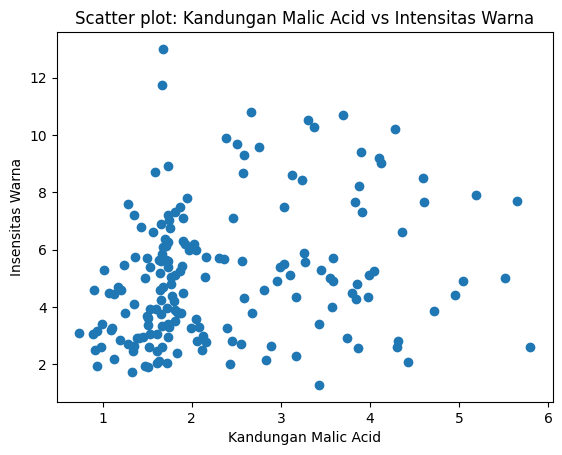

In [ ]:
# Visualisasi Awal
plt.scatter(X, y)
plt.xlabel('Kandungan Malic Acid')
plt.ylabel('Insensitas Warna')
plt.title('Scatter plot: Kandungan Malic Acid vs Intensitas Warna')
plt.show()

# Terlihat tidak ada korelasi dengan kandungan malic acid terhadap intensitas warna

In [14]:
# Bangun modelnya
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Lihat hasil model
print("Intercept (b0):", model.intercept_)
print("Regression Coefficient (b1):", model.coef_[0])
print("R-squared:", model.score(X,y))

# koefisien regresi -> jika malic acid naik 1, maka intensitas warna naik 0.5
# R-squared -> sekitar 6%(0.06) variasi intensitas warna dapat dijelaskan oleh kandungan malic acid saja, sisa 94%-nya dijelaskan oleh faktor lain
# Intercept 3.85092
# Maka persamaan model kita untuk prediksi adalah:
# Y = b0+b1X
# Intensitas Warna = 3.85092 + 0.51669088 x Malic_Acid -> berarti jika Malic_Acid=0 maka intensitas warna=3.85092

Intercept (b0): [3.85092]
Regression Coefficient (b1): [0.51669088]
R-squared: 0.0619937015742249


In [16]:
# Buat prediksi
y_pred = model.predict(X)

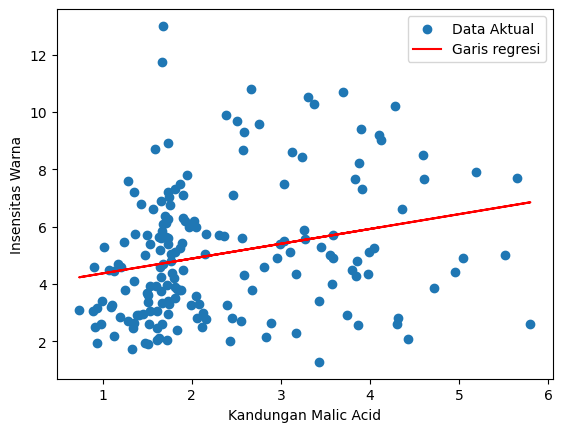

In [17]:
# Visualisasi garis regresi
plt.scatter(X,y,label='Data Aktual')
plt.plot(X, y_pred, color='red',label='Garis regresi')
plt.xlabel('Kandungan Malic Acid')
plt.ylabel('Insensitas Warna')
plt.legend()
plt.show()

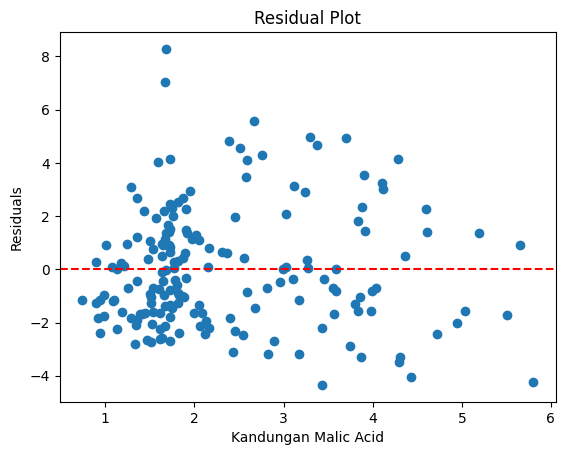

In [ ]:
# Hitung residual
residuals =  y - y_pred
plt.scatter(X, residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Kandungan Malic Acid')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Residual plot bertujuan untuk mengecek apakah asumsi lineartias dan homoskedastisitas (variasi konstran dan error) terpenuhi
# Cara bacanya:
# 1. Jika tersebar acak di sekitar 0 (garis merah), maka model linear cocok -> asumsi linear terpenuhi
# 2. Pola lengkung, maka hubungan mungkin non-linear -> coba tambahkan fitur non-linear (misal log atau polynomial)
# 3. Spread residual makin besar, maka varians error meningkat (heteroskedastisitas) -> mungkin perlu transformasi Y atau model robust
# 4. Outlier besar, maka ada observasi ekstrem -> perlu cek data (kemungkinan error input atau pengaruh besar)

# Berarti model dan data kita tidak baik karena memiliki spread residual besar dan outlier besar
# Yang artinya tidak memenuhi asumsi linearitas dan homoskedastisitas, dan perlu mengdrop outlier atau meneliti outlier lebih jauh

In [ ]:
# Multiple Linear Regression
# Di sini, kita memperluas simple linear regression dengan lebih dari 1 variabel prediktor atau independent (X1, X2, X3,....,Xn)
# Persamaan-nya:
# Y = b0 + b1X1 + b2X2 + ... + bpXp
# Y: nilai prediksi
# X1, X2,...,Xp: variabel: independen
# b0: Intercept
# b1, b2, ... , bn: koefisien regresi

# Kinerja model: RMSE, Rsquare, Residual Standard Error (RSE)
# RMSE: sqrt((E(yi-Yi)^2)/n) -> Rata-rata error prediksi - semakin kecil, semakin baik
# RSE: Mirip RMSE tapi dibagi dengan derajat bebas (n-p-1) -> Ukuran seberapa jauh data dari garis regresi
# R-squared (coefficienr of determination): Proporsi variasi Y yang dijelaskan model -> Semakin dekat ke 1, maka model semakin baik menjelaskan data
# RMSE & RSE = "seberapa besar kesalahan model"
# R-squared = "seberapa besar variasi data yang bisa dijelaskan oleh X"

# t-statistic and p-value
# Setiap koefisien regresi diuji apakah berbeda signifikan dari 0
# t-statistic = (estimasi koefisien) / (standard error)
# p-value kecil (< 0.05) -> variabel signifikan berpengaruh terhadap 

# Weighted Regression
# Ketika data punya varians berbeda antar titik (heteroskedastisitas)
# Untuk mengatasinya, tiap observasi diberi bobot (wi) dalam perhitungan: Minimize Ewi(yi-Yi)^2
# Observasi dengan bobot lebih tinggi akan lebih memengaruhi model
# Contoh: rumah dengan luas sangat besar punya error tinggi, jadi dikasih bobot lebih kecil

# Cross-Validation (validasi silang)
# Tujuannya adalah menilai performa model di data baru (generalization)
# Umumnya pakai k-Fold CV:
# bagi data jadi k bagian (misal 5 fold), latih model di 4 bagian, uji di bagian 1, ulang hingga semua fold pernah jadi data uji, hitung mean RMSE atau R-squared
# kalau nilai RMSE atau R-squared lebih buruk dari di training, maka ada indikasi overfitting

# Model selection & Stepwise regression
# Ketika ada banyak variabel independent atau prediktor, kita perlu memilih kombinasi terbaik
# Bandingkan model dengan: Adjuster R-squared, Akaike Information Criterion (AIC), dan Bayesian Information Criterion (BIC)
# Semakin kecil AIC/BIC maka model lebih efisien
# Stepwise regression -> model dibangun dengan menambah atau menghapus variabel satu persatu, berdasarkan kriteria (misal AIC)
# Jenisnya: 
# Forward selection: mulai dari nol -> tambah variabel satu persatu
# Backward elimination: mulai dari satu variabel -> hapus satu persatu
# Bidirectional: kombinasi keduanya

# Bias-Variance Tradeoff
# Bias:
# Seberapa jauh prediksi model dari nilai sebenarnya(error karena model terlalu sederhana): efek ke model tinggi - model tidak mampu menangkap pola sebenarnya (underfit)
# Variance:
# Seberapa sensitif model terhadap perubahan data training (error karena model terlalu rumit): efek ke model tinggi - model terlalu meniru noise dari data (overfit)
 
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Cek data
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# 3️⃣ Pilih variabel
X = df[['Alcohol', 'Flavanoids', 'Ash']]  # independent variables
y = df['Total_Phenols']                   # dependent variable

In [23]:
# 4️⃣ Model dengan sklearn (untuk prediksi)
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# 5️⃣ Hasil model
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3):", model.coef_)
print("R-squared:", model.score(X, y))

# Maka persamaan model kita untuk prediksi adalah:
# Y = b0+b1X1+b2X2+b3X3
# totaL Phenols = 0.281+0.066xAlcohol+0.527xFlavanoids+0.031xAsh

# Ketika semua X=0, maka total phenols = 0.28
# setiap kenaikan 1 unit alcohol, maka total phenols naik 0.06
# setiap kenaikan 1 unit flavanoids, maka total phenols naik 0.527
# setiap kenaikan 1 unit ash, maka total phenols naik 0.03

# R-squared=0.75 -> artinya, 75% variasi total phenols dapat dijelaskan oleh 3 variabel tersebut
# Semakin tinggi R-squared maka model semakin baik

Intercept (b0): 0.2811107152004344
Coefficients (b1, b2, b3): [0.06683739 0.52785469 0.03123355]
R-squared: 0.7551876267772861


In [ ]:
# 6️⃣ Prediksi dan RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# RMSE=0.308
# Berarti rata-rata kesalahan prediksi total phenols sekitar 0.308
# Semakin kecil RMSE maka semakin akurat

RMSE: 0.3087907614328347


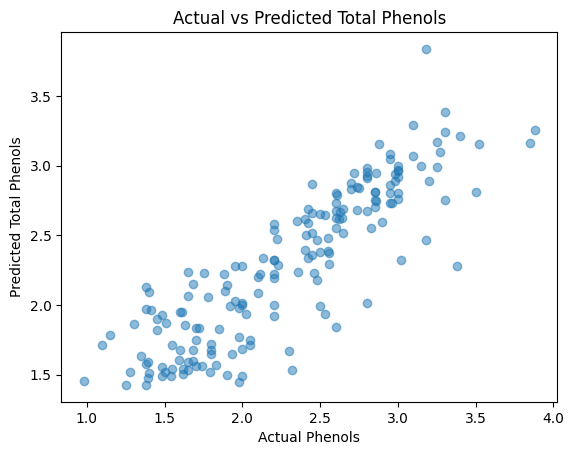

In [31]:
# 8️⃣ Visualisasi Prediksi vs Aktual
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Phenols")
plt.ylabel("Predicted Total Phenols")
plt.title("Actual vs Predicted Total Phenols")
plt.show()

In [ ]:
# 9️⃣ Model dengan statsmodels (untuk interpretasi)
X_sm = sm.add_constant(X)  # tambahkan intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

# R-squarednya 0.755 alias menjelaskan 75.5% total phenols dapat dijelaskan dari 3 variabel tersebut

# Adjusted R-squared digunakan ketika kita punya lebih dari satu variabel X. ia memberi penalti kalau menambah variabel yang tidak terlalu berguna
# Adjusted R-squared=0.751, yang artinya setelah memperhitungkn jumlah fitur/independen variabel - 
# - Model tetap kuat (R-squared=0.755->0.751) yang artinya, variabel tambahan yang kita masukkan relevan membantu
# Jika Adjusted R-squared menurun drastis dari R-squared, maka penambahan variabel tidak berguna

# F-statistic menguji apakah setidaknya satu keofisien tidak sama dengan nol
# Nilai F besar dan p-value kecil -> model secara keseluruhan signifikan
# F-statistic = 178.9 -> maka model regresi secara keseluruhan bermakna signifikan ada hubungan nyata antara X dan Y

# Maka persamaan model kita untuk prediksi adalah:
# Y = b0+b1X1+b2X2+b3X3
# totaL Phenols = 0.281+0.066xAlcohol+0.527xFlavanoids+0.031xAsh

# Coefficient menunjukan arah dan besar pengaruh:
# Positif -> naiknya X menaikkan Y
# Negatif -> naiknya X menurunkan Y
# Ketika semua X=0, maka total phenols = 0.28
# setiap kenaikan 1 unit alcohol, maka total phenols naik 0.06
# setiap kenaikan 1 unit flavanoids, maka total phenols naik 0.527
# setiap kenaikan 1 unit ash, maka total phenols naik 0.03

# Gabungan prediktor antara Alcohol, Flavanoids, dan Ash tidak signifikan, alias tidak berpengaruh dengan Total Phenols (p-value > 0.05 | 0.484 > 0.05)
# Variabel alkohol signifikan, alias berpengaruh pada total phenols (p-value < 0.05 | 0.029 < 0.05)
# Variabel flavanoids signifikan, alias berpengaruh pada total phenols (p-value < 0.05 | 0.000 < 0.05)
# Variabel Ash tidak signifikan, alias tidak berpengaruh pada total phenols (p-value > 0.05 | 0.722 > 0.05)

# t-statistic adalah seberapa jauh coefficient dari 0 (dalam satuan error)

# AIC/BIC 94.81 dan 107.5 -> belum ada artinya karena tidak ada model lain yang dibandingkan dengan model ini
# Jika skor AIC/BIC tetap lebih kecil model ini dibanding model lain, maka model ini lebih baik, tidak overfit, dan efisien

                            OLS Regression Results                            
Dep. Variable:          Total_Phenols   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           6.20e-53
Time:                        22:53:08   Log-Likelihood:                -43.405
No. Observations:                 178   AIC:                             94.81
Df Residuals:                     174   BIC:                             107.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2811      0.400      0.702      0.4

In [ ]:
# Factor Variables in Regression
# Factor variable adalah variabel kategorik, bukan numerik
# contoh: jenis kelamin [pria, wanita], wilayah [utara, selatan, timur, barat]
# Masalahnya, model regresi tidak bisa langsung membaca teks atau kategori
# Solusinya? kita ubah kategori menjadi dummy variables (one-hot encoding)

# Dummy variable representation
# Contoh: jenis kelamin
#
# Gender    | Dummy_wanita  |
# Pria      | 0             |
# Wanita    | 1             |
#
# Model regresinya menjadi: Y = b0+b1xDummy_Wanita+epsilon
# b0 -> rata-rata Y untuk kategori referensi (Pria)
# b1 -> perbedaan rata-rata antara wanita dan pria

# Factor Variables with many levels
# Kalau ada kategori banyak misalnya: region = {utara, selatan, timur, barat}
# maka, kita buat k-1 dummy variables, dimana k = jumlah kategori
#
# Region    | Selatan     | Timur     | Barat   |
# Utara     | 0           | 0         | 0       |
# Selatan   | 1           | 0         | 0       |
# Timur     | 0           | 1         | 0       |
# Barat     | 0           | 0         | 1       |
#
# "Utara" jasi kategori referensi (baseline)
# Model regresi akan punya koefisien untuk selatan, timur, dan barat -  yang menunjukan perbedaan rata-rata Y dibanding Utara

# Ordered Factor Variables (Faktor Berurutan)
# Kadang kategori punya urutan alami, misalnya:
# Pendidikan = {SMA < S1 < S2 < S3}
# Kalau urutan itu bermakna secara numerik, bisa diperlakukan sebagai ordinal variable
# Ada dua pendekatan:
# Ordinal: Caranya, ubah kategori jadi angka: SMA=1, S1=2, S2=3, S3=4 -> Model anggap jarak antar level konstan
# Dummy (tanpa urutan): gunakan one hot encoding -> model angga tiap tingkat berbeda tanpa pola linear
# Pilih ordinal jika kenaikan level dianggap punya efek berurutan (misal: setiap naik 1 tingkat pendidikan -> gaji naik 3 juta)
# Pilih dummy kalau antar level visa beda arah dan besar pengaruhnya tidak seragam

In [4]:
# -------------------------------------------------
# 1️⃣ Buat dataset contoh
# -------------------------------------------------
data = pd.DataFrame({
    'Salary': [50, 52, 55, 58, 60, 65, 70, 75, 80, 85],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'Education': ['SMA', 'S1', 'S1', 'S2', 'S2', 'S3', 'SMA', 'S3', 'S2', 'S1']
})

data.head()

,Salary,Region,Education
0,50,North,SMA
1,52,South,S1
2,55,East,S1
3,58,West,S2
4,60,North,S2


In [5]:
# -------------------------------------------------
# 2️⃣ Buat dummy variables untuk Region
# (4 kategori -> 3 dummy, 1 jadi baseline)
# -------------------------------------------------
region_dummies = pd.get_dummies(data['Region'], drop_first=True)

In [6]:
# -------------------------------------------------
# 3️⃣ Representasikan Education sebagai ordinal factor
# SMA < S1 < S2 < S3
# -------------------------------------------------
edu_order = {'SMA': 1, 'S1': 2, 'S2': 3, 'S3': 4}
data['Edu_num'] = data['Education'].map(edu_order)

In [13]:
# -------------------------------------------------
# 4️⃣ Gabungkan semua variabel ke dalam model
# -------------------------------------------------
X = pd.concat([region_dummies, data['Edu_num']], axis=1)
X = sm.add_constant(X)
y = data['Salary']
X = X.astype(float)
y = y.astype(float)

In [14]:
# -------------------------------------------------
# 5️⃣ Fit model regresi linear
# -------------------------------------------------
model = sm.OLS(y, X).fit()
print(model.summary())

# Region utara, selatan, dan barat tidak berpengaruh pada tinggi gaji
# Tingkat pendidikan juga sama
# Tapi, gabungan region dan tingkat pendidikan berpengaruh signifikan pada tinggi gaji seseorang

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                 -0.629
Method:                 Least Squares   F-statistic:                    0.1312
Date:                Tue, 21 Oct 2025   Prob (F-statistic):              0.964
Time:                        13:37:45   Log-Likelihood:                -38.097
No. Observations:                  10   AIC:                             86.19
Df Residuals:                       5   BIC:                             87.71
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0526     14.284      3.994      0.0

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
# Correlated Predictors dan Correlated Variables
# Definisi: Dua (atau lebih) variabel independen dikatakan correlated predictors kalau mereka saling berhubungan (misal x1 dan x2 punya korelasi tinggi)
# Misal: X1=luas rumah, X2=jumlah kamar -> jelas mereka berkorelasi kuat, karena makin besar rumah, maka semakin banyak kamar

# Multicollinearity
# Multicollinearity terjadi ketia dua atau lebih prediktor sangat berkorelasi satu sama lain
# Akibatnya: 
# Koefision regresi jadi tidak stabil. nilai SE besar - tstat kecil - pvalue naik, koefisien bisa bahkan berubah tanda (positif/negatif) kalau ada perubahan data
# Analogi: Bayangkan dua orang yang ngomong hal sama ke kamu, tapi kamu disuruh menilai siapa yang paling berpengaruh->susah banget, karena pesannya hampir identik
# Deteksi multicollinerity:
# data.corr(method=pearson), jika skor 0.8 antar variabel X, maka korelasi tinggi
# Variance Inflation Error, jika VIF < 5 maka aman, jika 5 <= VIF < 10 maka hati-hati ada indikasi multikolinearitas, jika VIF >= 10 maka Multikolinearitas kuat

# Cofounding Variables (variabel pengganggu)
# Definisi: Variabel yang terkait dengan X dan juga memengaruhi Y, sehingga bisa menipu hubungan sebab akibat
# Contoh:
# Orang yang bawa korek api lebih sering kena kanker paru-paru. apakah korek api menyebabkan kanker? tidak!
# Ternyata variabel perancunya adalah merokok-yang menyebabkan 2 hal sekaligus. yaitu perokok sudah pasti bawa korek api dan pasti kena kanker paru-paru

# Interactions and Main Effects
# Main Effects:
# Efek langsung dari masing-masing variabel terhadap Y
# Contoh: b2 = pengaruh X2 terhadap Y, asumsi -> efek X1 dan X2 tidak saling bergantung
# Interaction Effect:
# Kadang efek satu variabel bergantung pada nilai variabel lain
# Kita tambahkan produk variabelnya:
# Jika b2 signifikan berarti ada interaksi
# Contoh:
# X1=dosis obat, X2=jenis kelamin, Y=tekanan darah. kalau interaksi signifikan -> artinya efek dosis obat terhadap tekanan darah berbeda antara pria dan wanita

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [17]:
# 2️⃣ Buat dataset simulasi
np.random.seed(42)

n = 100
X1 = np.random.normal(50, 10, n)           # misal: "pendapatan"
X2 = X1 * 0.8 + np.random.normal(0, 5, n)  # berkorelasi tinggi dgn X1 (multicollinear)
Confound = np.random.normal(30, 5, n)      # variabel perancu (misal umur)
Y = 5 + 0.5*X1 + 0.3*Confound + np.random.normal(0, 5, n)

df = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2, 'Confound': Confound})
print(df.head())

           Y         X1         X2   Confound
0  37.875277  54.967142  36.896860  31.788937
1  36.348950  48.617357  36.790659  32.803923
2  47.599488  56.476885  43.467936  35.415256
3  51.247704  65.230299  48.172853  35.269010
4  35.658221  47.658466  37.320344  23.111653


In [18]:
# -------------------------------------------------------
# 3️⃣ Cek korelasi antar prediktor
# -------------------------------------------------------
print("\n📈 Korelasi antar variabel:")
print(df[['X1', 'X2', 'Confound']].corr())

# Terlihat X1 dan X2 berkorelasi tinggi dengan skor 0.8138


📈 Korelasi antar variabel:
                X1        X2  Confound
X1        1.000000  0.813799  0.190840
X2        0.813799  1.000000  0.149089
Confound  0.190840  0.149089  1.000000


In [19]:
# -------------------------------------------------------
# 4️⃣ Model tanpa variabel perancu (confounder)
# -------------------------------------------------------
model1 = smf.ols('Y ~ X1', data=df).fit()
print("\nModel tanpa Confounder:\n", model1.summary().tables[1])

# X1 berpengaruh signifikan terhadap Y


Model tanpa Confounder:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0150      2.597      6.552      0.000      11.862      22.168
X1             0.4513      0.052      8.653      0.000       0.348       0.555


In [20]:
# -------------------------------------------------------
# 5️⃣ Model dengan variabel perancu
# -------------------------------------------------------
model2 = smf.ols('Y ~ X1 + Confound', data=df).fit()
print("\nModel dengan Confounder:\n", model2.summary().tables[1])

# X1 dan Variabel pengganggu berpengaruh signifikan terhadap Y


Model dengan Confounder:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9162      3.178      2.806      0.006       2.609      15.223
X1             0.4140      0.050      8.350      0.000       0.316       0.512
Confound       0.3273      0.083      3.940      0.000       0.162       0.492


In [21]:
# -------------------------------------------------------
# 6️⃣ Cek Multicollinearity pakai VIF
# -------------------------------------------------------
X = sm.add_constant(df[['X1', 'X2', 'Confound']])
vif = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)
print("\n🔥 VIF:\n", vif)

# VIF constanta bisa diabaikan
# X1=3, X2=2.9, Confound=1.03, berarti aman tidak ada multikolinearitas antar prediktor


🔥 VIF:
 const       52.874375
X1           3.004898
X2           2.961282
Confound     1.037920
dtype: float64


In [22]:
# -------------------------------------------------------
# 7️⃣ Model dengan interaksi (X1 * Confound)
# -------------------------------------------------------
model3 = smf.ols('Y ~ X1 * Confound', data=df).fit()
print("\nModel dengan Interaksi:\n", model3.summary().tables[1])

# Semua p-value > 0.05 -> tidak ada pengaruh signifikan ke Y. interaksi antara X1 dan confound tidak berguna dan merusak model


Model dengan Interaksi:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.8889     14.324      0.760      0.449     -17.544      39.322
X1              0.3745      0.284      1.319      0.190      -0.189       0.938
Confound        0.2599      0.484      0.537      0.593      -0.701       1.221
X1:Confound     0.0013      0.009      0.141      0.888      -0.018       0.020


In [23]:
# Regression Diagnostics
# Tujuan utama dari diagnostics checking adalah:
# mengevaluasi apakah model regresi kita memenuhi asumsi klasik dan apakah ada pengamatan yang terlalu berpengaruh (outlier, leverage tinggi, dll)

# Standardizes residuals
# residual (ei) = yi-Yi
# standardized residuals (e^*i) = ei/se
# Intepretasi: biasanya dianggap normal kalau berada di kisaran +- 2, nilai di luar +-3 ada indikasi outlier

# Outliers
# Titik data yang punya residual besar -> model salah memprediksi observasi itu secara ekstrem
# Deteksi: gunakan standardized residuals, dab plot residuals vs fitted values -> titik jauh dari pola umum bisa jadi outlier
# Dampak: outlier bisa menarik garis regresi keluar dari tren sebenarnya -> menyebabkan model bias

# Influential Value
# Titik data yang punya pengaruh besar terhadap hasil estimasi keofisien model
# Ukuran umum: Cook's Distance (Di) -> menggabungkan informasi dari residual dan leverage
# Di = e^2i/p*MSE x hii/(1-hii)^2

# Leverage
# Seberapa jauh posisi prediktor sebuah titik dari rata-rata semua prediktor
# Simbol: hii
# Nilai leverage tinggi -> titik berada di pinggir area data
# Aturannya: hii > 2(p+1)/n

# Non-normal residuals (non-normality)
# Asumsi dasar regresi linear klasik: residual berdistribusi normal
# Diagnostik: Histogram atau Q-Q plot residuals, dan uji Shapiro-Walk atau uji Jarque-Bera
# Jika residual tidak normal: model bisa tetap valid untuk prediksi, tapi uji statistik (t, F) bisa tidak akurat
# Solusi: transformasi variabel Y (misalnya log(Y)), atau gunakan model robust

# Heterokedasticity
# Variansi residual tidak konstan di seluruh nilai X (artinya: penyebaran kesalahan membesar atau mengecil pada nilai prediksi tertentu)
# Diagnostik: plot residuals vs fitted values -> pola berbentuk corong berarti ada indikasi heteroskedastisitas
# Uji formal: Breusch-Pagan test, dan White test
# Solusi: Transformasi (Log(Y)), dan gunakan Weighted Least Squares (WLS)

# Partial residual plot
# Tujuannya untuk melihat hubungan antara satu prediktor tertentu dengan respon Y, sambil tetap mempertimbangkan efek variabel lain
# Intuisi:
# Ambil residual setelah mengeluarkan pengaruh semua variabel kecuali satu (plot residual itu terhadap prediktor -> bisa mendeteksi non-linearitas dan outlier)

from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

In [ ]:
# Residual
# Residual adalah Y aktual - Y prediksi 
# Jadi residual adalah selisih antara data aktual dan prediksi, jadi bisa disebut gap error
# Maka semakin tinggi residual berarti semakin tinggi error
# Makanye residual harus diminimalkan agar hasil model terbilang sangat baik

# Residual baru muncul setelah fitting model (garis regresi) karena kita baru bisa tahu berapa melesetnya model setelah garis terbentuk

# Residual Normal -> error kecil sering terjadi, error besar jarang
# Residual Non-Normal -> error besar sering terjadi, banyak outlier, bentukk bimodial, data mining

# Variansi residual konstan -> berarti variansi residual jaraknya bagus(1,2,1,3,2), kalau variansinya tidak konstan (1,5,20,3,10)
# Berarti datanya akan berbentuk corong. model sulit memprediksi data dengan nilai besar, tapi kalau nilai kecil masih sangat baik

In [24]:
# Ambil datanya
df = pd.read_excel(r"C:\Users\Robyi\Documents\Data Science Dataset\all.xlsx", sheet_name='wine')
df["Date"] = pd.to_datetime(df['Date'])
df.drop(columns=['Date','Customer_Segment'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
# -------------------------------------------------------------
# 3️⃣ Fit model regresi
# -------------------------------------------------------------
model = smf.ols('Flavanoids ~ Total_Phenols + Magnesium', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           4.84e-53
Time:                        15:11:07   Log-Likelihood:                -129.34
No. Observations:                 178   AIC:                             264.7
Df Residuals:                     175   BIC:                             274.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2052      0.281     -4.296


Beberapa standardized residual:
0    0.633041
1    0.481642
2    1.025193
3   -1.394536
4   -0.095894
Name: std_resid, dtype: float64


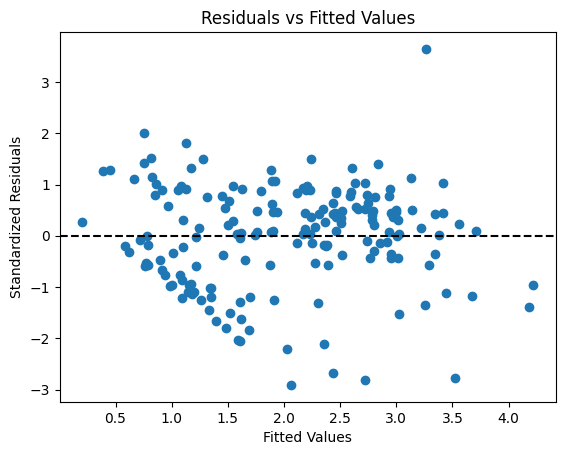

In [ ]:
# -------------------------------------------------------------
# 4️⃣ Standardized residuals
# -------------------------------------------------------------
influence = OLSInfluence(model)
df['std_resid'] = influence.resid_studentized_internal

print("\nBeberapa standardized residual:")
print(df['std_resid'].head())

# Plot residual vs fitted
plt.scatter(model.fittedvalues, df['std_resid'])
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Standardized Residual
# Jika nilai 0 maka prediksi pas
# +2 -> prediksi 2 SD di bawah data aktual (underpredict)
# -2 -> prediksi 2 SD di atas data aktual (overpredict)
# Residual < 2 -> normal
# Residual > 3 -> ada outlier potensial

# Residuals vs fitted values
# titik-titik menyebar acak di sekitar garis horizontal nol -> artinya model menjelaskan data dengan baik
# Warning!:
# Bentuk lengkung (smile or sad face): model terlalu sederhana -> mungkin ada non-linearity
# Bentuk corong (residual makin besar di ujung): variansi tak konstran -> indikasi heteroskedastisitas
# Beberapa itik ekstrem jauh dari ): outlier individual

# Berarti terdeteksi ada outlier di data kita

In [ ]:
# -------------------------------------------------------------
# 5️⃣ Outlier detection
# -------------------------------------------------------------
outliers = df[np.abs(df['std_resid']) > 3]
print("\n⚠️ Outliers terdeteksi:")
outliers

# Ada outlier di data kita, tepatnya di row 121
# karena residualnya > +-3
# Artinya model salah memprediksi data itu secara ekstrem
# Solusi:
# Cek di data asli: apakah ini data salah input atau memang fenomena unik?
# Coba drop outlier itu, lalu jalankan regresi ulang tanpa outlier itu. jika tidak berubah maka biarkan.jika berubah total maka model sensitif(ada influential point)


⚠️ Outliers terdeteksi:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,std_resid,leverage,cooks_d
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.0,0.93,3.69,465,3.645674,0.023382,0.106071


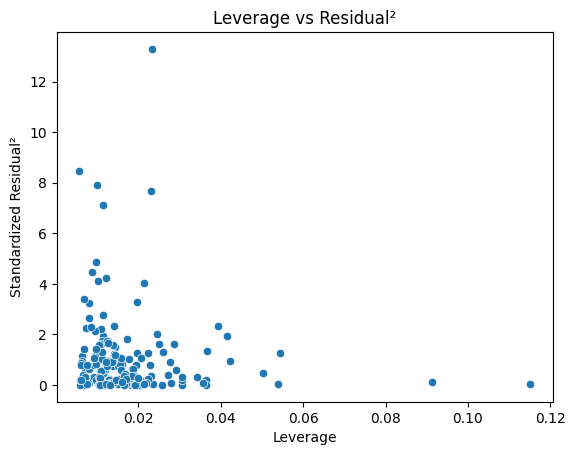


🔥 Influential points (Cook’s D > 1):
Empty DataFrame
Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, Proline, std_resid, leverage, cooks_d]
Index: []


In [ ]:
# -------------------------------------------------------------
# 6️⃣ Leverage dan Cook’s distance
# -------------------------------------------------------------
df['leverage'] = influence.hat_matrix_diag
df['cooks_d'] = influence.cooks_distance[0]

# Plot leverage vs residuals squared
sns.scatterplot(x=df['leverage'], y=df['std_resid']**2)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residual²')
plt.title('Leverage vs Residual²')
plt.show()

# Cook’s distance > 1 → influential
influential_points = df[df['cooks_d'] > 1]
print("\n🔥 Influential points (Cook’s D > 1):")
print(influential_points)

# Kalau titik data jauh di kanan maka leverage tinggi -> nilai X sangat esktrem (misal rumah sangat besar)
# Kalau titik data jauh di atas maka residual^2 tinggi -> prediksi meleset parah
# Kalau gabungan keduanya (posisi paling kanan dan atas) -> kombinasi ekstrem+salah prediksi: influential

# Terlihat ada banyak leverage tinggi dan residual^2 tinggi
# dan Influential points (Cook's D > 1) : empty dataframe -> berarti tidak ada satupun titik yang sangat berpengaruh besar terhadap model
# Berarti modelnya stabil, tidak ada observasi tunggal yang "mengendalikan" garis regresi



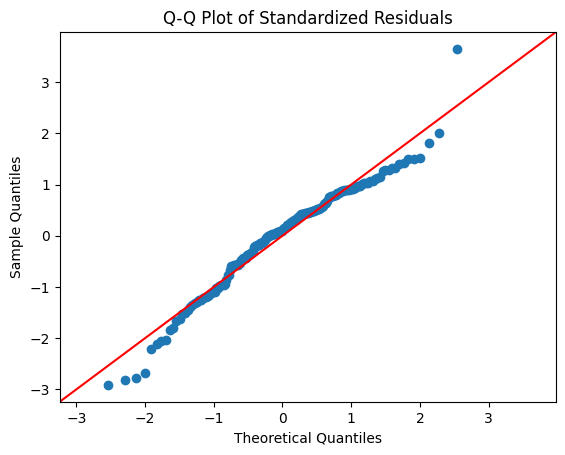


Normality test (Anderson-Darling): p-value = 0.0002
❌ Residual tidak normal (tolak H0).


In [ ]:
# -------------------------------------------------------------
# 7️⃣ Normality check
# -------------------------------------------------------------
sm.qqplot(df['std_resid'], line='45', fit=True)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

stat, p_value = normal_ad(df['std_resid'])
print(f"\nNormality test (Anderson-Darling): p-value = {p_value:.4f}")
if p_value < 0.05:
    print("❌ Residual tidak normal (tolak H0).")
else:
    print("✅ Residual berdistribusi normal.")

# Lengkung ke atas/bawah -> distribusi residual tidak normal
# ekor kanan atau kiri panjang -> ada skewwness atau outlier berat

# Residual tidak normal
# implikasinya: model masih bisa memprediksi dengan baik, tapi uji t dan F tidak valid
# Solusinya gunakan transformasi Y atau model yang lebih robust

In [ ]:
# -------------------------------------------------------------
# 8️⃣ Heteroskedasticity test
# -------------------------------------------------------------
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Stat', 'LM p-value', 'F-Stat', 'F p-value']
print("\nBreusch-Pagan test:")
print(dict(zip(labels, bp_test)))

if bp_test[1] < 0.05:
    print("❌ Ada indikasi heteroskedastisitas.")
else:
    print("✅ Tidak ada indikasi heteroskedastisitas.")

# Tidak ada heteroskedastistitas, jadi variansi residual konstan, maka model aman


Breusch-Pagan test:
{'LM Stat': 0.2333509440760677, 'LM p-value': 0.8898739352830556, 'F-Stat': 0.11485960789097446, 'F p-value': 0.8915584441142831}
✅ Tidak ada indikasi heteroskedastisitas.


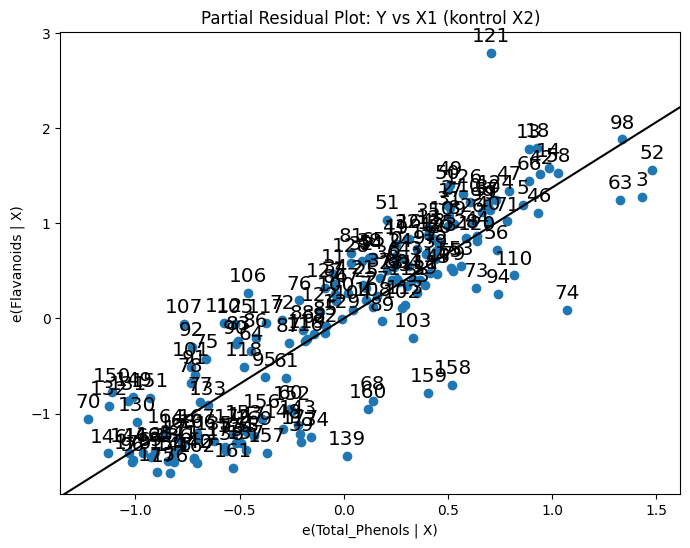

In [ ]:
# -------------------------------------------------------------
# 9️⃣ Partial residual plot
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.plot_partregress('Flavanoids', 'Total_Phenols', ['Magnesium'], data=df, ax=ax)
plt.title('Partial Residual Plot: Y vs X1 (kontrol X2)')
plt.show()

# Menunjukan hubungan murni antara Y dan X1 setelah efek X2 dikontrol (dikeluarkan)

# Jika garis lurus -> hubungan linear antara X1 dan Y tetap valid
# Jika melengkung -> mungkin ada hubungan non linear (solusi: lakukan transformasi Y, atau gunakan polynomial)
# Jika titik-titik ada yang jauh dari garis -> maka ada outlier khusus di X1

In [34]:
# Polynomial Regression
# Model linear mengasumsikan hubungan:
# Y = b0+b1X+epsilon
# Tapi sering kali hubungan tidak lurus, contohnya berbentuk lengkung
# Maka kita tambahkan pangkat X (kuadrat, kubik, etc):
# Y = b0 + b1X1 + b2X2^2 + b3X3^3 + epsilon
# Contoh: linear=garis lurus, kuadrat=parabola, kubik=lengkungan 2 arah
# Catatan penting:
# Kita harus menstandarisasi X (misal X_scaled = (X - mean)/std) supaya X^2 dan X^3 tidak membuat angka sangat besar
# Gunakan visualisasi untuk menentukan derajat polinomial (degree)

# Spline Regression
# Kadang hubungan tidak hanya melengkung secara global, tapi berubah bentuk di segmen tertentu
# Contoh:
# Harga rumah naik cepat saat ukuran < 100m, tapi stabil setelah 150m
# Kita bisa memotong sumbu X di titik tertentu, lalu membuat fungsi polinomial terpisah tapi tetap halus di titik potong (KNOTS)
# Bentuk umum:
# Y = b0 + b1X + b2(X-k1) + b3(X-k3) + epsilon
# kalau X < k -> 0
# kalau X >= k -> (X-k)

# Generalized Additive Model
# Spline regression bisa diperluas menjadi model:
# Y = b0 + f1(X1) + f2(X2) + ... + epsilon
# Jadi GAM adalah cara menggabungkan beberapa spline untuk variabel yang berbeda, tapi tetap menafsirkan efek tiap variabel secara terpisah
# Kelebihan GAM:
# Bisa menangkap pola kompleks tanpa eksplisit menyebut X^2, X^3, dst..
# Lebih fleksibel dari regresi linear biasa
# Mudah divisualisasikan (kita bisa lihat bentuk efek tiap X)

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM, s

In [ ]:
# Ambil datanya
df = pd.read_excel(r"C:\Users\Robyi\Documents\Data Science Dataset\all.xlsx", sheet_name='wine')
df["Date"] = pd.to_datetime(df['Date'])
df.drop(columns=['Date','Customer_Segment'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

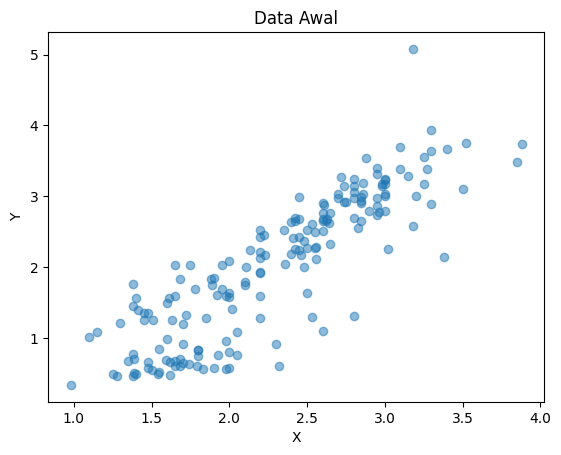

In [36]:
X =  df[['Total_Phenols']]
y = df[['Flavanoids']]

# Visual data
plt.scatter(X, y, alpha=0.5)
plt.title("Data Awal")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

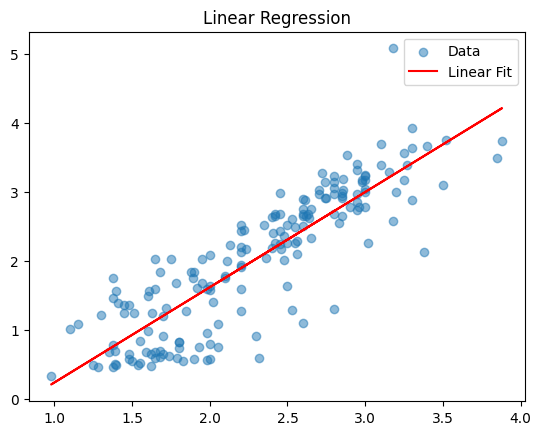

Linear Regression Coef: [[1.37984391]] Intercept: [-1.13762716]


In [ ]:
# -------------------------------------------------
# 3️⃣ Linear Regression (baseline)
# -------------------------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

plt.scatter(X, y, label="Data", alpha=0.5)
plt.plot(X, y_pred_lin, color="red", label="Linear Fit")
plt.title("Linear Regression")
plt.legend()
plt.show()

print("Linear Regression Coef:", lin_reg.coef_, "Intercept:", lin_reg.intercept_)

# Garis regresi cuman lurus

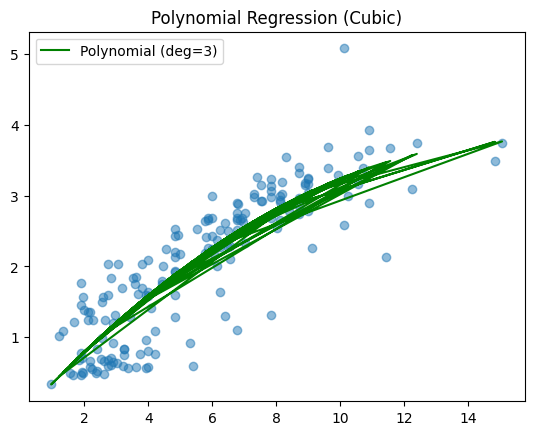

In [ ]:
# -------------------------------------------------
# 4️⃣ Polynomial Regression (degree=3)
# -------------------------------------------------

X = X ** 2 # Kita coba kuadrat kan X
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()) # Maka degree = 2 karena kita pakai kuadrat(pangkat 2)
poly_model.fit(X, y)
y_pred_poly = poly_model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred_poly, color="green", label="Polynomial (deg=3)")
plt.title("Polynomial Regression (Cubic)")
plt.legend()
plt.show()

# Kalau kita punya X nilai seperti kuadrat. pakai polynomial 2 derajat agar bisa menangkap pola melengkung

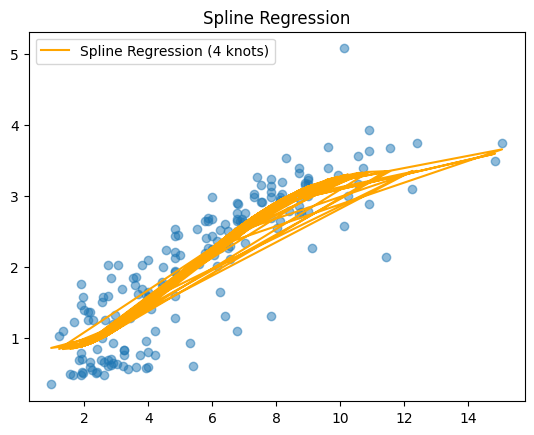

In [ ]:
# -------------------------------------------------
# 5️⃣ Spline Regression (Cubic Spline, 4 knots)
# -------------------------------------------------
spline_model = make_pipeline(SplineTransformer(degree=3, n_knots=4), LinearRegression())
spline_model.fit(X, y)
y_pred_spline = spline_model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred_spline, color="orange", label="Spline Regression (4 knots)")
plt.title("Spline Regression")
plt.legend()
plt.show()

# Terlihat, Spline bisa menarik garis secara fleksibel tapi tetap halus, tidak cuman melengkung global, tapi bisa punya banyak lengkungan
# Knots = 4 berarti kita melakukan perubahan kelengkungan sebanyak 4 kali

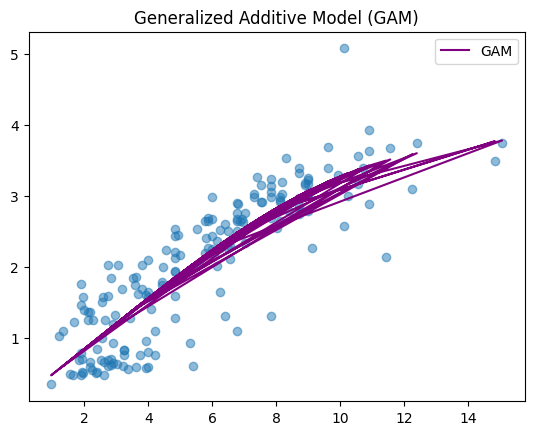

In [ ]:
# -------------------------------------------------
# 6️⃣ GAM (Generalized Additive Model)
# -------------------------------------------------
gam = LinearGAM(s(0, n_splines=6)).fit(X, y)
y_pred_gam = gam.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred_gam, color="purple", label="GAM")
plt.title("Generalized Additive Model (GAM)")
plt.legend()
plt.show()

# Terlihat, GAM bisa menggabungkan beberapa model Spline, jadi sangat fleksibe

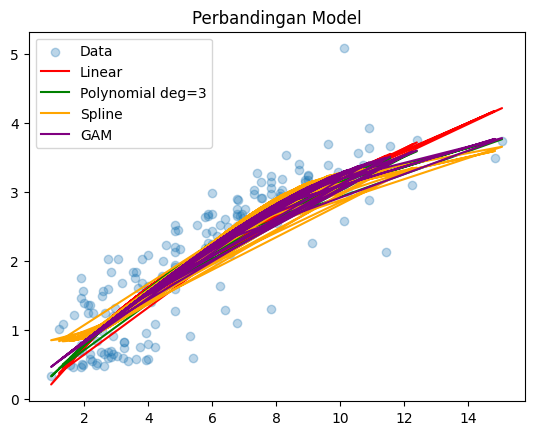

In [ ]:
# -------------------------------------------------
# 7️⃣ Bandingkan semua model di satu plot
# -------------------------------------------------
plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, y_pred_lin, color="red", label="Linear")
plt.plot(X, y_pred_poly, color="green", label="Polynomial deg=3")
plt.plot(X, y_pred_spline, color="orange", label="Spline")
plt.plot(X, y_pred_gam, color="purple", label="GAM")
plt.title("Perbandingan Model")
plt.legend()
plt.show()

# Hanya perbandingan

In [ ]:
content_md = """
# Bab: A/B Test

## Tujuan
Menentukan apakah perbedaan antara dua perlakuan (A dan B) signifikan secara statistik dan bermakna secara praktis. Digunakan pada konteks quality engineering untuk membandingkan metode produksi, parameter mesin, atau algoritma kontrol kualitas.

## Sub-bab: Sequential Test of Statistical Hypotheses
Sequential testing memungkinkan evaluasi hasil secara berulang selama pengumpulan data. Eksperimen dapat dihentikan lebih awal jika bukti cukup, sehingga lebih efisien untuk monitoring waktu-nyata dan proses streaming.

### Confidence Sequences
Interval kepercayaan yang tetap valid sepanjang waktu walau dilakukan analisis berulang. Cocok untuk estimasi performa proses secara kontinu tanpa melanggar kontrol kesalahan statistik.

### Sequential p-values
p-value yang diperbarui secara berurutan ketika data baru masuk. Memungkinkan pengambilan keputusan real-time (lanjut/hentikan) sambil menjaga kontrol terhadap false positive.

### Stochastic Ordering Hypothesis
Hipotesis non-parametrik yang menyatakan satu distribusi secara stokastik lebih baik atau lebih buruk daripada yang lain (mis. \(F_A(x) \ge F_B(x)\) untuk semua x). Berguna ketika ingin membandingkan keseluruhan distribusi, bukan hanya rata-rata.

### Canary Test Run
Uji coba skala kecil (pilot) sebelum penerapan penuh. Berguna untuk mendeteksi efek samping atau gangguan operasional pada satu lini sebelum meluncurkan perubahan ke seluruh pabrik atau sistem.

### Quantile Distribution Comparison
Perbandingan distribusi berdasarkan quantile (median, Q1, Q3, tails) untuk melihat perubahan bentuk distribusi, variabilitas, atau perilaku ekor. Alat: Q–Q plots, tes non-parametrik (mis. K–S).

## Sub-bab: A/A Test
Eksperimen kontrol di mana dua grup identik dibandingkan (A vs A). Tujuannya memvalidasi infrastruktur eksperimen: randomisasi, pembagian sampel, pipeline data, dan metrik. Jika A/A test menunjukkan perbedaan signifikan, itu menandakan masalah pada sistem eksperimen.

## Ringkasan Konseptual
- **A/B Test (bab)**: Kerangka eksperimen untuk membandingkan dua perlakuan.
- **Sequential Test (sub-bab)**: Metode adaptif untuk evaluasi berulang dan berhenti dini.
- **Confidence Sequences & Sequential p-values (sub-sub-bab)**: Teknik untuk menjaga validitas inferensi saat monitoring berkelanjutan.
- **Stochastic Ordering & Quantile Comparison**: Pendekatan yang fokus pada perbandingan distribusi, bukan hanya mean.
- **Canary Test Run**: Praktik deployment/pengujian bertahap.
- **A/A Test (sub-bab)**: Validasi sistem eksperimen sebelum A/B test aktual.

"""

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ SEQUENTIAL TEST (SPRT - Sequential Probability Ratio Test)
# ============================================================

# Kita ingin mendeteksi apakah rata-rata proses meningkat
# H0: mean = 0   |   H1: mean = 0.5
# Sequential test akan berhenti lebih cepat jika bukti sudah cukup kuat

np.random.seed(0)
data = np.random.normal(0.5, 1, 200)  # Simulasi data dengan mean = 0.5 (H1 benar)

mu0, mu1, sigma = 0, 0.5, 1
A, B = 5, 1/5  # Threshold keputusan
llr = 0
decision = None

for i, x in enumerate(data, start=1):
    # Hitung log-likelihood ratio setiap observasi
    llr += np.log(stats.norm(mu1, sigma).pdf(x) / stats.norm(mu0, sigma).pdf(x))
    if llr > np.log(A):
        decision = "Terima H1 (mean > 0)"
        break
    elif llr < np.log(B):
        decision = "Terima H0 (mean = 0)"
        break

print(f"Sequential test berhenti pada sample ke-{i}, hasil: {decision}")

# 🧠 Interpretasi:
# Jika hasilnya “Terima H1” berarti data cukup kuat menunjukkan bahwa rata-rata > 0.
# Jika test berhenti lebih cepat (misal sebelum 200), artinya bukti sangat kuat.
# Jika hasilnya “Terima H0”, maka belum cukup bukti bahwa rata-rata naik.
# Ini cocok untuk deteksi dini perubahan performa proses produksi.

Sequential test berhenti pada sample ke-3, hasil: Terima H1 (mean > 0)


c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


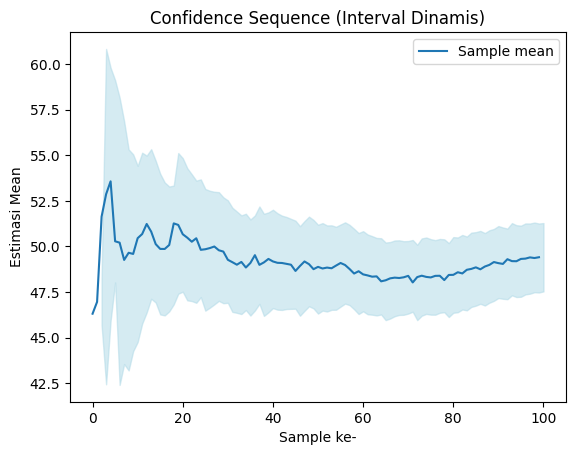

In [2]:
# ============================================================
# 2️⃣ CONFIDENCE SEQUENCE (interval kepercayaan dinamis)
# ============================================================

# Kita ingin melihat bagaimana interval kepercayaan berubah setiap kali data baru masuk.
data = np.random.normal(50, 10, 100)
means, lower, upper = [], [], []
alpha = 0.05

for t in range(1, len(data)+1):
    sample = data[:t]
    m = np.mean(sample)
    se = np.std(sample, ddof=1) / np.sqrt(t)
    z = stats.norm.ppf(1 - alpha/2)
    means.append(m)
    lower.append(m - z*se)
    upper.append(m + z*se)

plt.fill_between(range(1, 101), lower, upper, color='lightblue', alpha=0.5)
plt.plot(means, label='Sample mean')
plt.xlabel('Sample ke-')
plt.ylabel('Estimasi Mean')
plt.title('Confidence Sequence (Interval Dinamis)')
plt.legend()
plt.show()

# 🧠 Interpretasi:
# Jika pita biru semakin sempit seiring bertambahnya data,
# maka ketidakpastian berkurang (semakin yakin dengan estimasi mean).
# Jika garis rata-rata (hitam) stabil di sekitar nilai benar (sekitar 50),
# berarti sistem proses stabil dan tidak ada drift besar.

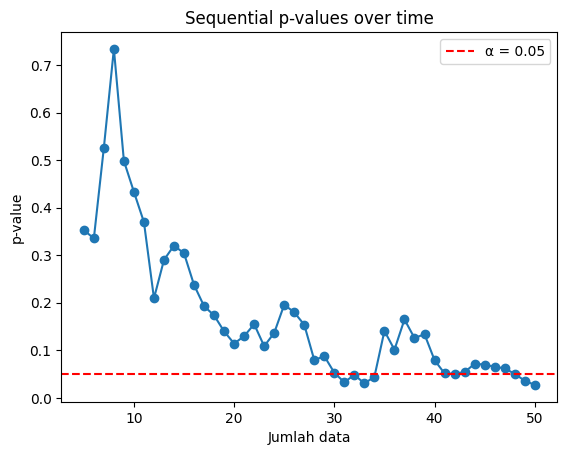

In [3]:
# ============================================================
# 3️⃣ SEQUENTIAL p-VALUES
# ============================================================

# Sequential p-values: kita lihat bagaimana p-value berubah saat data bertambah.
data = np.random.normal(0.5, 1, 50)
p_values = []
for t in range(5, len(data)+1):
    p = stats.ttest_1samp(data[:t], 0).pvalue
    p_values.append(p)

plt.plot(range(5, len(data)+1), p_values, marker='o')
plt.axhline(0.05, color='red', linestyle='--', label='α = 0.05')
plt.title("Sequential p-values over time")
plt.xlabel("Jumlah data")
plt.ylabel("p-value")
plt.legend()
plt.show()

# 🧠 Interpretasi:
# Jika p-value menurun di bawah garis merah (0.05),
# maka mulai saat itu hasil eksperimen signifikan (menolak H0).
# Jika p-value naik-turun di sekitar 0.05, berarti belum cukup stabil.
# Dalam praktik industri, kita berhenti ketika p-value < 0.05 dan stabil.

In [4]:
# ============================================================
# 4️⃣ STOCHASTIC ORDERING HYPOTHESIS
# ============================================================

# Bandingkan dua distribusi tanpa asumsi normalitas
x = np.random.exponential(1, 100)
y = np.random.exponential(0.8, 100)

ks_stat, p_val = stats.ks_2samp(x, y, alternative='greater')
print(f"KS test statistic: {ks_stat:.3f}, p-value: {p_val:.4f}")

# 🧠 Interpretasi:
# Jika p-value < 0.05 → artinya distribusi Y secara stokastik lebih kecil dari X.
# Misalnya: waktu produksi Y lebih cepat daripada X (lebih efisien).
# Jika p-value > 0.05 → tidak ada cukup bukti bahwa Y lebih baik.
# Ini cocok untuk membandingkan performa dua metode tanpa asumsi bentuk distribusi.

KS test statistic: 0.070, p-value: 0.6139


In [5]:
# ============================================================
# 5️⃣ CANARY TEST RUN
# ============================================================

# Misal grup canary adalah versi baru, grup control versi lama
control = np.random.normal(100, 5, 1000)
canary = np.random.normal(102, 5, 100)  # Sedikit lebih tinggi (lebih baik)

t_stat, p_val = stats.ttest_ind(canary, control)
print(f"T-test canary vs control: t={t_stat:.2f}, p-value={p_val:.4f}")

# 🧠 Interpretasi:
# Jika p-value < 0.05 → performa canary berbeda signifikan dari kontrol.
# Jika rata-rata canary lebih tinggi, artinya perubahan versi baru berdampak positif.
# Jika p-value > 0.05 → tidak ada perbedaan signifikan, berarti aman untuk rollout penuh.
# Canary test membantu mencegah kegagalan sistem besar-besaran.

T-test canary vs control: t=4.71, p-value=0.0000


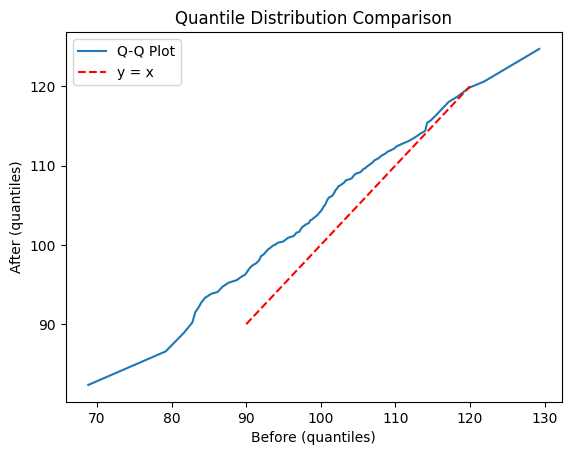

In [6]:
# ============================================================
# 6️⃣ QUANTILE DISTRIBUTION COMPARISON
# ============================================================

# Bandingkan distribusi hasil produksi sebelum dan sesudah perubahan proses
before = np.random.normal(100, 10, 500)
after = np.random.normal(105, 8, 500)

quantiles = np.linspace(0, 1, 100)
q_before = np.quantile(before, quantiles)
q_after = np.quantile(after, quantiles)

plt.plot(q_before, q_after, label='Q-Q Plot')
plt.plot([90, 120], [90, 120], 'r--', label='y = x')
plt.xlabel("Before (quantiles)")
plt.ylabel("After (quantiles)")
plt.title("Quantile Distribution Comparison")
plt.legend()
plt.show()

# 🧠 Interpretasi:
# Jika titik-titik berada di atas garis merah (y=x),
# maka nilai-nilai "after" lebih tinggi dari "before" → ada peningkatan performa.
# Jika garis miring lebih curam → variabilitas berubah (distribusi jadi lebih rapat atau lebih lebar).
# Ini berguna untuk melihat perubahan distribusi secara keseluruhan, bukan hanya rata-rata.

In [7]:
# ============================================================
# 7️⃣ A/A TEST
# ============================================================

# Dua grup identik: seharusnya tidak ada perbedaan signifikan
A1 = np.random.normal(100, 10, 500)
A2 = np.random.normal(100, 10, 500)

t_stat, p_val = stats.ttest_ind(A1, A2)
print(f"A/A test: t={t_stat:.2f}, p-value={p_val:.4f}")

# 🧠 Interpretasi:
# Jika p-value > 0.05 → eksperimen berjalan baik (tidak ada bias atau error).
# Jika p-value < 0.05 padahal grup identik → ada masalah pada sistem eksperimen
#   (contohnya: kesalahan randomisasi, perhitungan metrik, atau noise sistemik).
# A/A test dilakukan sebelum A/B test untuk memastikan validitas sistem eksperimen.

A/A test: t=-1.22, p-value=0.2215
